# Introduction
#### This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers

# Business Understanding
####  The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

#### When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

#### If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

#### If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

#### The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

#### The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

#### ll other cases: All other cases when the payment is paid on time.

 

 

#### When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

#### Approved: The Company has approved loan Application

#### Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

##### Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

##### Unused offer:  Loan has been cancelled by the client but on different stages of the process.

#### In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

 

# Business Objectives
#### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

#### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

#### To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

 

# 1. Importing the data

In [1]:
# Importing libraries to be used in this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Reading the data by creating a dataframe
df = pd.read_csv("application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# 2. Inspection of the data

In [3]:
# Inspect the dataframe
df.shape

(307511, 122)

In [4]:
# Inspect the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Inspect the dataframe
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

# 3. Identifying  & handling missing values

In [6]:
# Indetifying the column wise values information and data type

df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
# Finding out column wise null values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

## 3a. Checking columns wise null value %

In [8]:
# Checking columns wise null value %
round(100*(df.isnull().sum()/len(df.index)), 2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

##### As we can see this gives us no clear picture about missing values that which columns have how many missing and what percentage of total values in that columns. Let's write a customised missing value table function

In [9]:
# Function to calculate missing values by column
def missing_values_summary(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " rows.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# To get the summary of column wise missing values and % of missing values, we will use our customize function
missing_values = missing_values_summary(df)
missing_values.head(41)

Your selected dataframe has 122 columns and 307511 rows.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4
BASEMENTAREA_MEDI                 179943               58.5
BASEMENTAREA_AVG                  179943               58.5
BASEMENTAREA_MODE                 179943               58.5
EXT_SOURCE_1                      173378               56.4
NONLIVINGAREA_MEDI                169682               55.2
NONLIVINGAREA_MODE                169682               55.2
NONLIVINGAREA_AVG                 169682               55.2
ELEVATORS_MEDI                    163891               53.3
ELEVATORS_MODE                    163891               53.3
ELEVATORS_AVG                     163891               53.3
WALLSMATERIAL_MODE                156341               50.8
APARTMENTS_MODE                   156061               50.7
APARTMENTS_MEDI                   156061               50.7
APARTMENTS_AVG                    156061               50.7
ENTRANCES_MODE                    154828               50.3
ENTRANCES_AVG                     154828               50.3
ENTRANCES_MEDI                    154828               50.3
LIVINGAREA_MEDI                   154350               50.2
LIVINGAREA_MODE                   154350               50.2
LIVINGAREA_AVG                    154350               50.2
HOUSETYPE_MODE                    154297               50.2

## 3b. Droping the columns with more than 50% of missing values

In [11]:
# Droping the columns with more than 50% of missing values

df = df.dropna(thresh=df.shape[0]*0.5,how='all',axis=1)
df.shape

(307511, 81)

In [12]:
# After dropping the columns with more than 50% null values again chekcing the data frame information

df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

## 3c. EDA for columns with around 13 % missing values

In [13]:
# Again using our customize function to find out columns with around 13% misisng values 

missing_values = missing_values_summary(df)
missing_values.head(50)

Your selected dataframe has 81 columns and 307511 rows.
There are 26 columns that have missing values.


Missing Values  % of Total Values
FLOORSMAX_AVG                         153020               49.8
FLOORSMAX_MODE                        153020               49.8
FLOORSMAX_MEDI                        153020               49.8
YEARS_BEGINEXPLUATATION_AVG           150007               48.8
YEARS_BEGINEXPLUATATION_MODE          150007               48.8
YEARS_BEGINEXPLUATATION_MEDI          150007               48.8
TOTALAREA_MODE                        148431               48.3
EMERGENCYSTATE_MODE                   145755               47.4
OCCUPATION_TYPE                        96391               31.3
EXT_SOURCE_3                           60965               19.8
AMT_REQ_CREDIT_BUREAU_HOUR             41519               13.5
AMT_REQ_CREDIT_BUREAU_QRT              41519               13.5
AMT_REQ_CREDIT_BUREAU_MON              41519               13.5
AMT_REQ_CREDIT_BUREAU_WEEK             41519               13.5
AMT_REQ_CREDIT_BUREAU_DAY              41519               13.5
AMT_REQ_CREDIT_BUREAU_YEAR             41519               13.5
NAME_TYPE_SUITE                         1292                0.4
DEF_30_CNT_SOCIAL_CIRCLE                1021                0.3
OBS_60_CNT_SOCIAL_CIRCLE                1021                0.3
DEF_60_CNT_SOCIAL_CIRCLE                1021                0.3
OBS_30_CNT_SOCIAL_CIRCLE                1021                0.3
EXT_SOURCE_2                             660                0.2
AMT_GOODS_PRICE                          278                0.1
AMT_ANNUITY                               12                0.0
CNT_FAM_MEMBERS                            2                0.0
DAYS_LAST_PHONE_CHANGE                     1                0.0

##### As it is very clear now that columns named 

1. AMT_REQ_CREDIT_BUREAU_HOUR	
2. AMT_REQ_CREDIT_BUREAU_QRT
3. AMT_REQ_CREDIT_BUREAU_MON 
4. AMT_REQ_CREDIT_BUREAU_WEEK
5. AMT_REQ_CREDIT_BUREAU_DAY
6. AMT_REQ_CREDIT_BUREAU_YEAR 

##### are the 6 columns with 13.5 % missing values. Now we will report the mean & median values which can be imputed in these columns

In [14]:
df_report = df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_YEAR"]].copy()
df_report.head(20)

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_QRT  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          NaN                        NaN   
4                          0.0                        0.0   
5                          0.0                        1.0   
6                          0.0                        1.0   
7                          0.0                        0.0   
8                          0.0                        0.0   
9                          NaN                        NaN   
10                         0.0                        0.0   
11                         0.0                        0.0   
12                         0.0                        0.0   
13                         0.0                        0.0   
14                         NaN                        NaN   
15                         0.0                        0.0   
16                         0.0                        1.0   
17                         NaN                        NaN   
18                         0.0                        0.0   
19                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         NaN                         NaN   
4                         0.0                         0.0   
5                         0.0                         0.0   
6                         1.0                         0.0   
7                         0.0                         0.0   
8                         0.0                         0.0   
9                         NaN                         NaN   
10                        1.0                         0.0   
11                        0.0                         0.0   
12                        1.0                         0.0   
13                        0.0                         0.0   
14                        NaN                         NaN   
15                        0.0                         0.0   
16                        0.0                         0.0   
17                        NaN                         NaN   
18                        0.0                         0.0   
19                        0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0                         1.0  
1                         0.0                         0.0  
2                         0.0                         0.0  
3                         NaN                         NaN  
4                         0.0                         0.0  
5                         0.0                         1.0  
6                         0.0                         2.0  
7                         0.0                         0.0  
8                         0.0                         1.0  
9                         NaN                         NaN  
10                        0.0                         0.0  
11                        0.0                         2.0  
12                        0.0                         0.0  
13                        0.0                         1.0  
14                        NaN                         NaN  
15                        0.0                         1.0  
16                        0.0                         0.0  
17                        NaN                         NaN  
18                        0.0                         0.0  
19                        0.0                         2.0

In [15]:
# Now we will write a function of report mean & median for all the colulms
def report_mean_median(df):
        # Mean Value
        mean_value = df.mean(axis=0)
        
        # Median Value
        median_value = df.median(axis=0)
        
        # Make a table with the results
        report_val_table = pd.concat([mean_value, median_value], axis=1)
        
        # Rename the columns
        report_val_table_ren_columns = report_val_table.rename(
        columns = {0 : 'Mean', 1 : 'Median'})
        
          # Return the dataframe with mean & median values information fro reporting
        return report_val_table_ren_columns

In [16]:
report = report_mean_median(df_report)
report.head(6)

Mean  Median
AMT_REQ_CREDIT_BUREAU_HOUR  0.006402     0.0
AMT_REQ_CREDIT_BUREAU_QRT   0.265474     0.0
AMT_REQ_CREDIT_BUREAU_MON   0.267395     0.0
AMT_REQ_CREDIT_BUREAU_WEEK  0.034362     0.0
AMT_REQ_CREDIT_BUREAU_DAY   0.007000     0.0
AMT_REQ_CREDIT_BUREAU_YEAR  1.899974     1.0

In [17]:
df_report.describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.265474   
std                      0.083849                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.007000                    1.899974  
std                     0.110757                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                     9.000000                   25.000000

##### Now we have understood the mean and median values which can be imputed in case of the above mentioned 6 columns. It is quite evident that appropriate value for imputing the missing values will be the mean value. Further, i have mentioned the code below by which we can impute the missing value in these 6 columsn. But, as we just need to report the values i have commented the code out.

In [18]:
# Code for imputing missing values in the 6 columns by mean values

# df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_HOUR']), ['AMT_REQ_CREDIT_BUREAU_HOUR']] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()
# df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = df['AMT_REQ_CREDIT_BUREAU_QRT'].mean()
# df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_MON']), ['AMT_REQ_CREDIT_BUREAU_MON']] = df['AMT_REQ_CREDIT_BUREAU_MON'].mean()
# df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_WEEK']), ['AMT_REQ_CREDIT_BUREAU_WEEK']] = df['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()
# df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_DAY']), ['AMT_REQ_CREDIT_BUREAU_DAY']] = df['AMT_REQ_CREDIT_BUREAU_DAY'].mean()
# df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_YEAR']), ['AMT_REQ_CREDIT_BUREAU_YEAR']] = df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

## 3d. Checking the datatype, handling anomalous data & changing the datatype wherever required

In [19]:
# Cumulative summary of data types

df.dtypes.value_counts()

int64      41
float64    27
object     13
dtype: int64

In [20]:
# Number of unique classes that is level of categorical variable in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
dtype: int64

In [21]:
# Changing negative days into postive

df["DAYS_BIRTH"] = abs(df["DAYS_BIRTH"])
df["DAYS_EMPLOYED"] = abs(df["DAYS_EMPLOYED"])
df["DAYS_REGISTRATION"] = abs(df["DAYS_REGISTRATION"])
df["DAYS_ID_PUBLISH"] = abs(df["DAYS_ID_PUBLISH"])
df["DAYS_LAST_PHONE_CHANGE"] = abs(df["DAYS_LAST_PHONE_CHANGE"])

In [22]:
# The DAYS_BIRTH column reports the days from the current loan application, 
# which is incomprehensible in its current format. So we divide by 365 to get a better understanding.
(df['DAYS_BIRTH']/365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

##### We see that the average age of the applicant is 43 years old, and the minimum is 20 years old, and the maximum is 69 years old which make sense.

Text(0, 0.5, 'frequency')

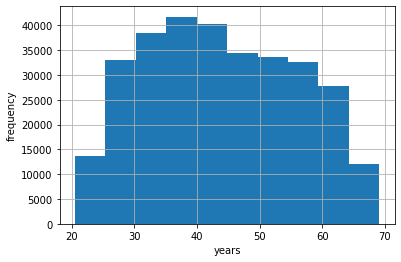

In [23]:
# PLot a histogram to better analyse DAYS BIRTH Column
(df['DAYS_BIRTH']/365).hist()
plt.xlabel('years')
plt.ylabel('frequency')

In [24]:
# Now we inspect the Days Employed columns
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [25]:
# By Further inspecting we find out that there are precisely 55374 points that are anomalous
# Which have a extreme outlying high value of 365243 days (>1000 years) and this is a large part of the data set

df['DAYS_EMPLOYED'].value_counts()

365243    55374
200         156
224         152
199         151
230         151
          ...  
11555         1
14832         1
14719         1
13344         1
10893         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [26]:
# Replacing the anomalous datapoints with Nan

df['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

Text(0, 0.5, 'frequency')

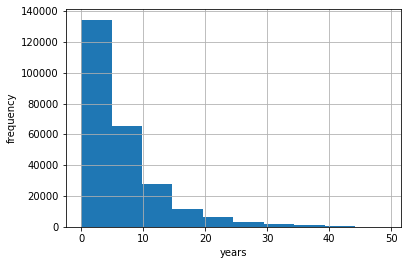

In [27]:
# Plot a histogram to better analyse the DAYS EMPLOYED Column

(df['DAYS_EMPLOYED']/365).hist()
plt.xlabel('years')
plt.ylabel('frequency')

## 3e. Reporting outliers in columns with numeric entries

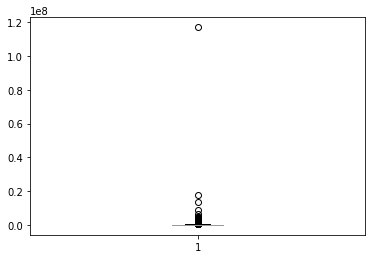

In [28]:
# Using boxplot for outlier detection :: for AMT_INCOME_TOTAL Column
plt.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

##### As you can see, the boxplot of AMT_INCOME_TOTAL is pretty unreadable, since AMT_INCOME_TOTAL varies across a wide range as shown below.

In [29]:
# Inspecting the column after converting into millions :: MAX value is 117 mn which is an extreme outlier
(df["AMT_INCOME_TOTAL"]/10**6).describe()

count    307511.000000
mean          0.168798
std           0.237123
min           0.025650
25%           0.112500
50%           0.147150
75%           0.202500
max         117.000000
Name: AMT_INCOME_TOTAL, dtype: float64

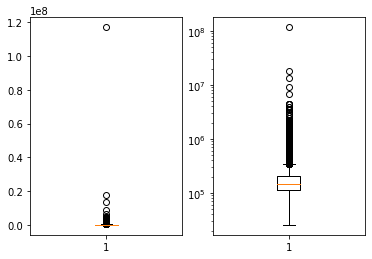

In [30]:
# Transform an axis into the logarithmic scale for proper plotting

plt.subplot(1, 2, 1)
plt.boxplot(df['AMT_INCOME_TOTAL'])


# log scale subplot
plt.subplot(1, 2, 2)
plt.boxplot(df['AMT_INCOME_TOTAL'])
plt.yscale('log')
plt.show()

In [31]:
# Setting up MAX_THRESHOLD in term of 0.9999 quantile for detecting outliers
min_threshold, max_threshold = df.AMT_INCOME_TOTAL.quantile([0.0001, 0.9999])
min_threshold, max_threshold

(27000.0, 2250000.0)

In [32]:
# As the data set also have students so we will not focus on the min threshold, reporting outliers for max threshold

df[df.AMT_INCOME_TOTAL>max_threshold]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
20216       123587       0         Cash loans           M            Y   
49645       157471       0         Cash loans           F            Y   
77768       190160       0         Cash loans           F            Y   
82846       196091       0         Cash loans           F            N   
86026       199821       0         Cash loans           M            Y   
101007      217276       0    Revolving loans           M            Y   
103006      219563       0    Revolving loans           M            Y   
107926      225210       0         Cash loans           M            Y   
131127      252084       0         Cash loans           M            Y   
181698      310601       0         Cash loans           M            Y   
187833      317748       0         Cash loans           M            N   
203693      336147       0         Cash loans           M            Y   
204564      337151       0         Cash loans           M            N   
246858      385674       0         Cash loans           M            Y   
248159      387126       1         Cash loans           F            Y   
258773      399467       0    Revolving loans           M            Y   
284311      429258       0         Cash loans           M            Y   
287463      432980       0         Cash loans           M            Y   
298082      445335       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1       117000000.0    562491.0   
20216                N             0         3825000.0   1241023.5   
49645                N             0         3600000.0    953460.0   
77768                N             0         9000000.0   1431531.0   
82846                Y             1         3375000.0    900000.0   
86026                Y             1         3375000.0    900000.0   
101007               Y             0         3150000.0   2250000.0   
103006               Y             0         4500000.0   2250000.0   
107926               Y             0         2930026.5    900000.0   
131127               N             0         6750000.0    790830.0   
181698               Y             1         3950059.5    675000.0   
187833               N             0         4500000.0    835380.0   
203693               Y             2        18000090.0    675000.0   
204564               N             0         4500000.0    450000.0   
246858               Y             0        13500000.0   1400503.5   
248159               Y             1         3150000.0    900000.0   
258773               Y             2         2700000.0    180000.0   
284311               N             0         3600000.0   1113840.0   
287463               Y             0         4500000.0   1755000.0   
298082               Y             0         2475000.0   1125000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
12840       26194.5  ...                 0                0                0   
20216      117369.0  ...                 0                0                0   
49645       68791.5  ...                 0                0                0   
77768      132601.5  ...                 0                0                0   
82846       40801.5  ...                 0                0                0   
86026       46084.5  ...                 0                0                0   
101007     225000.0  ...                 0                0                0   
103006     225000.0  ...                 0                0                0   
107926      36657.0  ...                 0                0                0   
131127      52978.5  ...                 0                0                0   
181698      66217.5  ...                 1                0                0   
187833      42651.0  .

##### The 20 cases are over and above our max threshold but these can also be attributed to income disparity in the society

##### As it is quite evident that there is an extreme outlier in the AMT_INCOME_TOTAL column, which is under Cash Loans Type, Working and Married. The Value of this outlier is near 117 mn.

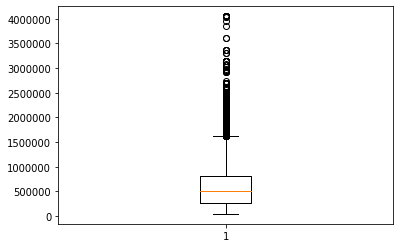

In [33]:
# Using boxplot for outlier detection :: for AMT_CREDIT Column
plt.boxplot(df['AMT_CREDIT'])
plt.show()

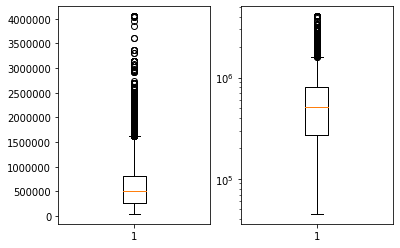

In [34]:
# Transform an axis into the logarithmic scale for proper plotting

plt.subplot(1, 2, 1)
plt.boxplot(df['AMT_CREDIT'])


# log scale subplot
plt.subplot(1, 2, 2)
plt.boxplot(df['AMT_CREDIT'])
plt.yscale('log')
plt.show()

In [35]:
# Inspecting the column 
(df["AMT_CREDIT"]/10**6).describe()

count    307511.000000
mean          0.599026
std           0.402491
min           0.045000
25%           0.270000
50%           0.513531
75%           0.808650
max           4.050000
Name: AMT_CREDIT, dtype: float64

In [36]:
# Setting up MAX_THRESHOLD in term of 0.9999 quantile for detecting outliers
min_threshold, max_threshold = df.AMT_CREDIT.quantile([0.0001, 0.9999])
min_threshold, max_threshold

(45000.0, 3030530.759998136)

In [37]:
df[df.AMT_CREDIT>max_threshold]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
14643       117085       0         Cash loans           F            Y   
14852       117337       0         Cash loans           M            N   
17948       120926       0         Cash loans           M            Y   
32099       137220       0         Cash loans           M            Y   
53936       162494       0         Cash loans           M            Y   
95571       210956       0         Cash loans           M            N   
98646       214538       0         Cash loans           F            N   
104577      221360       0         Cash loans           M            Y   
110459      228135       0         Cash loans           M            N   
119380      238431       0         Cash loans           F            Y   
119681      238782       0         Cash loans           M            Y   
120757      240007       0         Cash loans           M            N   
122681      242239       0         Cash loans           M            N   
133766      255139       0         Cash loans           F            Y   
153358      277759       0         Cash loans           M            Y   
155169      279870       0         Cash loans           M            N   
161197      286869       0         Cash loans           M            Y   
164982      291254       0         Cash loans           M            N   
170935      298097       0         Cash loans           M            Y   
180450      309128       0         Cash loans           F            Y   
184460      313808       0         Cash loans           M            Y   
186230      315893       1         Cash loans           F            N   
206594      339462       0         Cash loans           M            N   
239197      377037       0         Cash loans           F            Y   
250837      390234       0         Cash loans           M            Y   
279961      424374       0         Cash loans           M            Y   
285733      430924       0         Cash loans           F            Y   
286205      431470       0         Cash loans           F            Y   
287732      433294       0         Cash loans           F            Y   
288455      434170       0         Cash loans           F            Y   
288662      434415       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
14643                N             2          749331.0   3956274.0   
14852                Y             1          760846.5   4050000.0   
17948                N             2          783000.0   4050000.0   
32099                N             1          337500.0   3150000.0   
53936                N             0          900450.0   3600000.0   
95571                Y             0          430650.0   4031032.5   
98646                N             0          405000.0   3150000.0   
104577               N             0          468000.0   3600000.0   
110459               N             2          864900.0   4050000.0   
119380               N             0          292050.0   3860019.0   
119681               Y             1          931365.0   4050000.0   
120757               N             0          587250.0   4050000.0   
122681               N             1          727870.5   3150000.0   
133766               N             1         1307587.5   4050000.0   
153358               Y             0          351891.0   3150000.0   
155169               N             1          313200.0   3075579.0   
161197               N             0          282073.5   3150000.0   
164982               N             0          431478.0   3150000.0   
170935               Y             1         1575000.0   3299688.0   
180450               N             0          303750.0   3150000.0   
184460               N             1          391972.5   3375000.0   
186230               N             0          458550.0   4027680.0   
206594               N       

#####  The mean AMT_CREDIT is 0.6 mn but the max AMT_CREDIT is 4 mn. The above mentioned 31 data points can be considered as outliers but its more likely to be a result of income disparity in the society

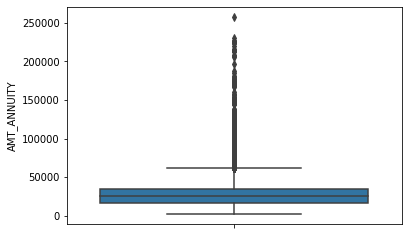

In [38]:
# Using boxplot for outlier detection :: for AMT_ANNUITY Column
sns.boxplot(data=df, y="AMT_ANNUITY")

In [39]:
# Inspecting the column 
(df["AMT_ANNUITY"]/10**6).describe()

count    307499.000000
mean          0.027109
std           0.014494
min           0.001615
25%           0.016524
50%           0.024903
75%           0.034596
max           0.258026
Name: AMT_ANNUITY, dtype: float64

In [40]:
# Setting up MAX_THRESHOLD in term of 0.9999 quantile for detecting outliers
min_threshold, max_threshold = df.AMT_ANNUITY.quantile([0.0001, 0.9999])
min_threshold, max_threshold

(2742.7446, 213291.0)

In [41]:
# Reporting outliers for AMT_ANNUITY Column
df[df.AMT_ANNUITY>max_threshold]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12108       114122       0    Revolving loans           M            Y   
15501       118093       0    Revolving loans           F            Y   
17948       120926       0         Cash loans           M            Y   
20119       123467       0    Revolving loans           F            Y   
23582       127443       0    Revolving loans           M            N   
32100       137221       0    Revolving loans           F            N   
66528       177152       0    Revolving loans           M            Y   
101007      217276       0    Revolving loans           M            Y   
101508      217854       0         Cash loans           F            N   
103006      219563       0    Revolving loans           M            Y   
104938      221773       0    Revolving loans           M            Y   
109209      226657       0    Revolving loans           M            Y   
128189      248689       0    Revolving loans           M            Y   
132913      254159       0    Revolving loans           F            N   
141371      263908       0    Revolving loans           M            Y   
144204      267201       0    Revolving loans           F            N   
145673      268905       0    Revolving loans           M            Y   
145707      268946       0    Revolving loans           M            Y   
157614      282697       0    Revolving loans           M            Y   
165190      291492       0    Revolving loans           M            Y   
184287      313601       0    Revolving loans           F            Y   
221460      356532       0         Cash loans           M            Y   
240036      377954       0         Cash loans           M            Y   
265026      406901       0    Revolving loans           F            N   
266148      408308       0    Revolving loans           M            Y   
268278      410861       0    Revolving loans           M            Y   
268455      411101       0    Revolving loans           F            N   
301712      449536       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12108                Y             0         1080000.0   2250000.0   
15501                Y             0          270000.0   2250000.0   
17948                N             2          783000.0   4050000.0   
20119                Y             0          675000.0   2250000.0   
23582                N             0          675000.0   2250000.0   
32100                Y             1          405000.0   2250000.0   
66528                Y             1         1800000.0   2250000.0   
101007               Y             0         3150000.0   2250000.0   
101508               N             0         1575000.0   2303460.0   
103006               Y             0         4500000.0   2250000.0   
104938               N             0          900000.0   2250000.0   
109209               Y             0         1350000.0   2250000.0   
128189               Y             0         1800000.0   2250000.0   
132913               Y             3          675000.0   2250000.0   
141371               Y             3         1350000.0   2250000.0   
144204               Y             2          450000.0   2250000.0   
145673               N             0         2250000.0   2250000.0   
145707               Y             0          225000.0   2250000.0   
157614               Y             2         1125000.0   2250000.0   
165190               Y             4          765000.0   2250000.0   
184287               Y             0          630000.0   2250000.0   
221460               Y             1          796500.0   2303460.0   
240036               N             3         1350000.0   2250000.0   
265026               Y             0          450000.0   2250000.0   
266148               N             0          900000.0   2250000.0   
268278               Y             0     

#####  The mean AMT_ANNUITY is 0.027 mn but the max AMT_ANNUITY is .25 mn. The above mentioned 28 data points can be considered as outliers but its more likely to be a result of income disparity in the society

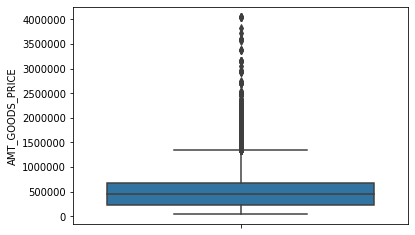

In [42]:
# Using boxplot for outlier detection :: for AMT_GOODS_PRICE Column
sns.boxplot(data=df, y="AMT_GOODS_PRICE")

In [43]:
# Inspecting the column 
(df["AMT_GOODS_PRICE"]/10**6).describe()

count    307233.000000
mean          0.538396
std           0.369446
min           0.040500
25%           0.238500
50%           0.450000
75%           0.679500
max           4.050000
Name: AMT_GOODS_PRICE, dtype: float64

In [44]:
# Setting up MAX_THRESHOLD in term of 0.9999 quantile for detecting outliers
min_threshold, max_threshold = df.AMT_GOODS_PRICE.quantile([0.0001, 0.9999])
min_threshold, max_threshold

(45000.0, 2934964.799999725)

In [45]:
# Reporting outliers for AMT_GOODS_PRICE Column
df[df.AMT_GOODS_PRICE>max_threshold]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8940        110403       1         Cash loans           M            Y   
14643       117085       0         Cash loans           F            Y   
14852       117337       0         Cash loans           M            N   
17948       120926       0         Cash loans           M            Y   
32099       137220       0         Cash loans           M            Y   
53936       162494       0         Cash loans           M            Y   
95571       210956       0         Cash loans           M            N   
98646       214538       0         Cash loans           F            N   
104577      221360       0         Cash loans           M            Y   
110459      228135       0         Cash loans           M            N   
119380      238431       0         Cash loans           F            Y   
119681      238782       0         Cash loans           M            Y   
120757      240007       0         Cash loans           M            N   
122681      242239       0         Cash loans           M            N   
133766      255139       0         Cash loans           F            Y   
153358      277759       0         Cash loans           M            Y   
161197      286869       0         Cash loans           M            Y   
164982      291254       0         Cash loans           M            N   
170935      298097       0         Cash loans           M            Y   
180450      309128       0         Cash loans           F            Y   
184460      313808       0         Cash loans           M            Y   
186230      315893       1         Cash loans           F            N   
206594      339462       0         Cash loans           M            N   
239197      377037       0         Cash loans           F            Y   
250837      390234       0         Cash loans           M            Y   
279961      424374       0         Cash loans           M            Y   
285733      430924       0         Cash loans           F            Y   
286205      431470       0         Cash loans           F            Y   
287732      433294       0         Cash loans           F            Y   
288455      434170       0         Cash loans           F            Y   
288662      434415       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8940                 Y             0          315000.0   2961000.0   
14643                N             2          749331.0   3956274.0   
14852                Y             1          760846.5   4050000.0   
17948                N             2          783000.0   4050000.0   
32099                N             1          337500.0   3150000.0   
53936                N             0          900450.0   3600000.0   
95571                Y             0          430650.0   4031032.5   
98646                N             0          405000.0   3150000.0   
104577               N             0          468000.0   3600000.0   
110459               N             2          864900.0   4050000.0   
119380               N             0          292050.0   3860019.0   
119681               Y             1          931365.0   4050000.0   
120757               N             0          587250.0   4050000.0   
122681               N             1          727870.5   3150000.0   
133766               N             1         1307587.5   4050000.0   
153358               Y             0          351891.0   3150000.0   
161197               N             0          282073.5   3150000.0   
164982               N             0          431478.0   3150000.0   
170935               Y             1         1575000.0   3299688.0   
180450               N             0          303750.0   3150000.0   
184460               N             1          391972.5   3375000.0   
186230               N             0          458550.0   4027680.0   
206594               N       

#####  The mean AMT_GOODS_PRICE is 0.53 mn but the max AMT_GOODS_PRICE is 4.05 mn. The above mentioned 31 data points can be considered as outliers but its more likely to be a result of PRICE disparity in the society

## 3f. Binning of continuos variables

In [46]:
# First we will bin the DAYS_BIRTH Column & to do that we will inspect the column first

(df["DAYS_BIRTH"]/365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [47]:
# Binning the DAYS_BIRTH into a column named AGE_BINNED
df['AGE_BINNED'] = pd.cut((df['DAYS_BIRTH']/365), [20,30,40,50,60,70], labels=['20-30','30-40', '40-50', '50-60','60-70'])
df[["AGE_BINNED","DAYS_BIRTH"]].head(10)

AGE_BINNED  DAYS_BIRTH
0      20-30        9461
1      40-50       16765
2      50-60       19046
3      50-60       19005
4      50-60       19932
5      40-50       16941
6      30-40       13778
7      50-60       18850
8      50-60       20099
9      30-40       14469

##### Above we can see that we have succesfully binned the DAYS_BIRTH COLUMN into age buckets

In [48]:
# Simillarly we will bin the DAYS_EMPLOYED Column & to do that we will inspect the column first

(df["DAYS_EMPLOYED"]/365).describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [49]:
# Binning the DAYS_EMPLOYED into a column named TENURE_BINNED
df['TENURE_BINNED'] = pd.cut((df['DAYS_EMPLOYED']/365), [0,2,5,10,20,25,50], labels=['0-2','2-5','5-10','10-20','20-25','25-50'])
df[["TENURE_BINNED","DAYS_EMPLOYED"]].head(10)

TENURE_BINNED  DAYS_EMPLOYED
0           0-2          637.0
1           2-5         1188.0
2           0-2          225.0
3          5-10         3039.0
4          5-10         3038.0
5           2-5         1588.0
6          5-10         3130.0
7           0-2          449.0
8           NaN            NaN
9          5-10         2019.0

##### Above we can see that we have succesfully binned the DAYS_EMPLOYED COLUMN into tenure buckets

In [50]:
# Simillarly we will bin the AMT_REQ_CREDIT_BUREAU_YEAR Column & to do that we will inspect the column first

df["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [51]:
# Binning the DAYS_EMPLOYED into a column named TENURE_BINNED
df['CREDIT_BUREAU_ENQ_BINNED'] = pd.cut(df['AMT_REQ_CREDIT_BUREAU_YEAR'], [-1,5,10,15,20,25], labels=['Low Risk','Moderate Risk','Intermediate Risk','High Risk',"Very High Risk"])
df[["CREDIT_BUREAU_ENQ_BINNED","AMT_REQ_CREDIT_BUREAU_YEAR"]].head(10)

CREDIT_BUREAU_ENQ_BINNED  AMT_REQ_CREDIT_BUREAU_YEAR
0                 Low Risk                         1.0
1                 Low Risk                         0.0
2                 Low Risk                         0.0
3                      NaN                         NaN
4                 Low Risk                         0.0
5                 Low Risk                         1.0
6                 Low Risk                         2.0
7                 Low Risk                         0.0
8                 Low Risk                         1.0
9                      NaN                         NaN

##### Above data table cleary shows that we have binned the Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application) into 5 categories and created a new column CREDIT_BUREAU_ENQ_BINNED

In [52]:
df.shape

(307511, 84)

# 4. Exploratory Data Analysis

## 4a. Check for Imbalance % of Target Variable

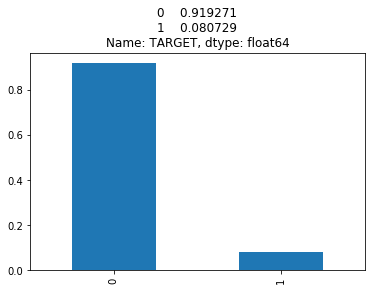

In [53]:
# Checking for Imbalance %
title = str(df['TARGET'].value_counts(normalize=True))
df['TARGET'].value_counts(normalize=True).plot.bar(title=title)

In [54]:
df['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

##### So we can cleary see that the 92 % of data is of non defaulted (0) and 8% of data is of defaulter(1)

## 4b. Divide the data into two dataframes i.e Target =1 and Target=0

In [55]:
# Spliting Dataframe based on Target Variable value ==0
df_target_zero = df[df['TARGET'] == 0]
df_target_zero.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...  FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
1  ...                 0                        0.0                       0.0   
2  ...                 0                        0.0                       0.0   
3  ...                 0                        NaN                       NaN   
4  ...                 0                        0.0                       0.0   
5  ...                 0                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_BINNED  \
1                       0.0                         0.0       40-50   
2                       0.0                         0.0       50-60   
3                       NaN                         NaN       50-60   
4                       0.0                         0.0       50-60   
5                       1.0                         1.0       40-50   

   TENURE_BINNED  CREDIT_BUREAU_ENQ_BINNED  
1            2-5                  Low Risk  
2            0-2                  Low Risk  
3           5-10                       NaN  
4           5-10                  Low Risk  
5            2-5                  Low Risk  

[5 rows x 84 columns]

In [56]:
df_target_zero.shape

(282686, 84)

In [57]:
# Spliting Dataframe based on Target Variable value ==1
df_target_one = df[df['TARGET'] == 1]
df_target_one.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    ...  FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0   ...                 0                        0.0   
26  ...                 0                        0.0   
40  ...                 0                        0.0   
42  ...                 0                        0.0   
81  ...                 0                        0.0   

   AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                        0.0   
26                       0.0                        0.0   
40                       0.0                        0.0   
42                       0.0                        0.0   
81                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                       0.0   
26                       0.0                       2.0   
40                       2.0                       0.0   
42                       0.0                       0.0   
81                       0.0                       0.0   

    AMT_REQ_CREDIT_BUREAU_YEAR  AGE_BINNED  TENURE_BINNED  \
0                          1.0       20-30            0-2   
26                         2.0       50-60           5-10   
40                         4.0       40-50            2-5   
42                         2.0       30-40           5-10   
81                         0.0       60-70            NaN   

    CREDIT_BUREAU_ENQ_BINNED  
0                   Low Risk  
26                  Low Risk  
40                  Low Risk  
42                  Low Risk  
81                  Low Risk  

[5 rows x 84 columns]

In [58]:
df_target_one.shape

(24825, 84)

### Filtering Out 25-30 useful columns to refine or both datasets.

In [59]:
df_target_zero.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [60]:
df_target_zero = df_target_zero[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_BINNED', 'TENURE_BINNED',
       'CREDIT_BUREAU_ENQ_BINNED']]

In [61]:
df_target_zero.shape

(282686, 42)

In [62]:
df_target_one = df_target_one[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_BINNED', 'TENURE_BINNED',
       'CREDIT_BUREAU_ENQ_BINNED']]

In [63]:
df_target_one.shape

(24825, 42)

## 4c. Univariate Analysis

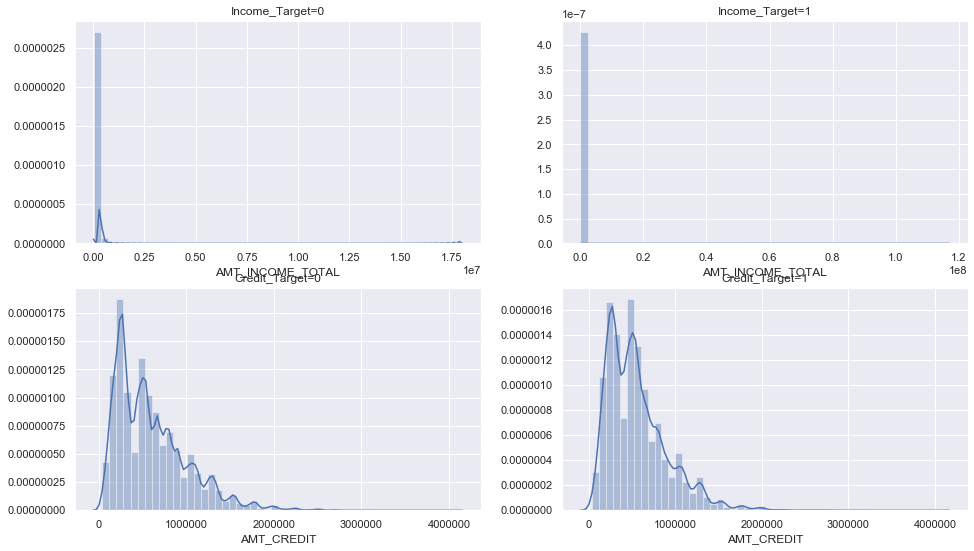

In [64]:
# First we will perform univariate analysis for columns with numerical values Comparing df_target_zero to df_target_one

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})
# Income Comparison
plt.subplot(2, 2, 1)
plt.title('Income_Target=0')
sns.distplot(df_target_zero['AMT_INCOME_TOTAL'])


plt.subplot(2, 2, 2)
plt.title('Income_Target=1')
sns.distplot(df_target_one['AMT_INCOME_TOTAL'])

# Credit Comparison
plt.subplot(2, 2, 3)
plt.title('Credit_Target=0')
sns.distplot(df_target_zero['AMT_CREDIT'])


plt.subplot(2, 2, 4)
plt.title('Credit_Target=1')
sns.distplot(df_target_one['AMT_CREDIT'])

plt.show()

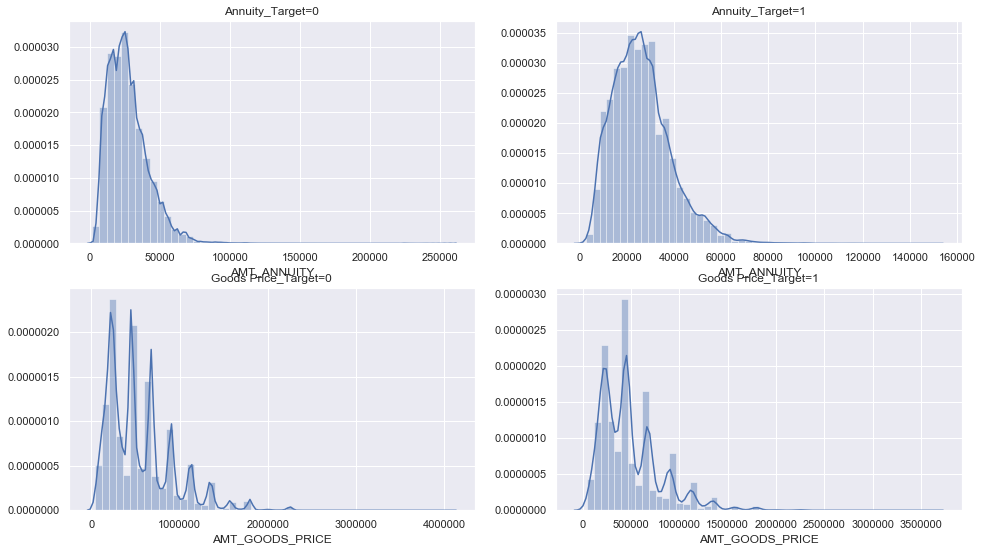

In [65]:
# First we will perform univariate analysis(Numerical) for df_target_zero

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})
# Annuity comparison
plt.subplot(2, 2, 1)
plt.title('Annuity_Target=0')
sns.distplot(df_target_zero['AMT_ANNUITY'])


plt.subplot(2, 2, 2)
plt.title('Annuity_Target=1')
sns.distplot(df_target_one['AMT_ANNUITY'])

# Goods Price Compparison
plt.subplot(2, 2, 3)
plt.title('Goods Price_Target=0')
sns.distplot(df_target_zero['AMT_GOODS_PRICE'])

# Goods Price
plt.subplot(2, 2, 4)
plt.title('Goods Price_Target=1')
sns.distplot(df_target_one['AMT_GOODS_PRICE'])

plt.show()

##### The above analysis does not provide any significant difference in the distribution of defaulter cases with non default cases.

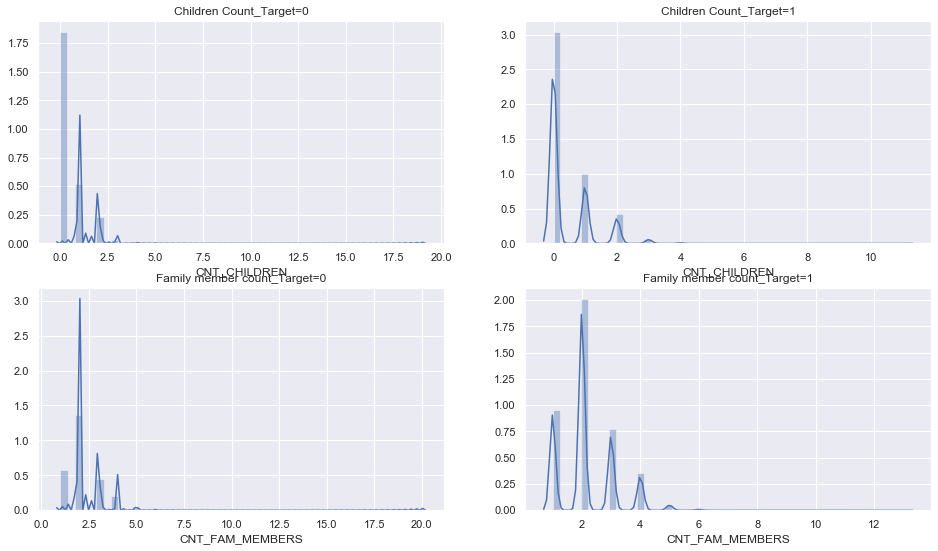

In [66]:
# First we will perform univariate analysis for columns with numerical values Comparing df_target_zero to df_target_one

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})
# Children count comparison Comparison
plt.subplot(2, 2, 1)
plt.title('Children Count_Target=0')
sns.distplot(df_target_zero['CNT_CHILDREN'])


plt.subplot(2, 2, 2)
plt.title('Children Count_Target=1')
sns.distplot(df_target_one['CNT_CHILDREN'])

# Family member count comparison
plt.subplot(2, 2, 3)
plt.title('Family member count_Target=0')
sns.distplot(df_target_zero['CNT_FAM_MEMBERS'])


plt.subplot(2, 2, 4)
plt.title('Family member count_Target=1')
sns.distplot(df_target_one['CNT_FAM_MEMBERS'])

plt.show()

##### The clients having lesser family size are more likelt to default
##### The Client with no children are more likely to default

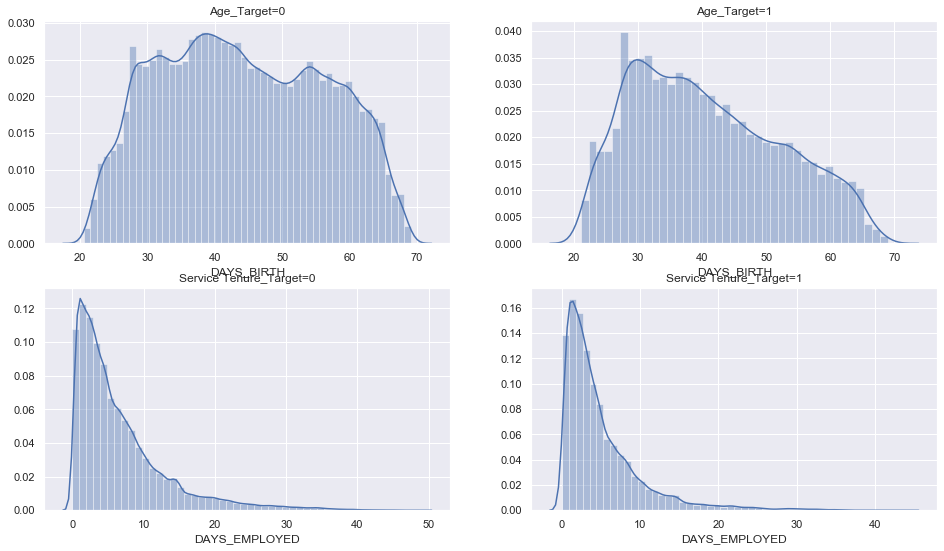

In [67]:
# First we will perform univariate analysis for columns with numerical values Comparing df_target_zero to df_target_one

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})
# Age comparison
plt.subplot(2, 2, 1)
plt.title('Age_Target=0')
sns.distplot(df_target_zero['DAYS_BIRTH']/365)


plt.subplot(2, 2, 2)
plt.title('Age_Target=1')
sns.distplot(df_target_one['DAYS_BIRTH']/365)

# Family member count comparison
plt.subplot(2, 2, 3)
plt.title('Service Tenure_Target=0')
sns.distplot(df_target_zero['DAYS_EMPLOYED']/365)


plt.subplot(2, 2, 4)
plt.title('Service Tenure_Target=1')
sns.distplot(df_target_one['DAYS_EMPLOYED']/365)

plt.show()

##### By the above mentioned analysis it is quite evident that most of the people defauling are from teh age group of less than 35 and around 30 years. While the distributions of non defaulters is slightly evenly distributed across the age range of 20 to 70 years but the distribution for defaulters are skewed towards the younger age and with  peak near  25-30 years. This suggest the people with a gae less than thirty and in the intial phase of their job are mosk likely to default on loan payment.

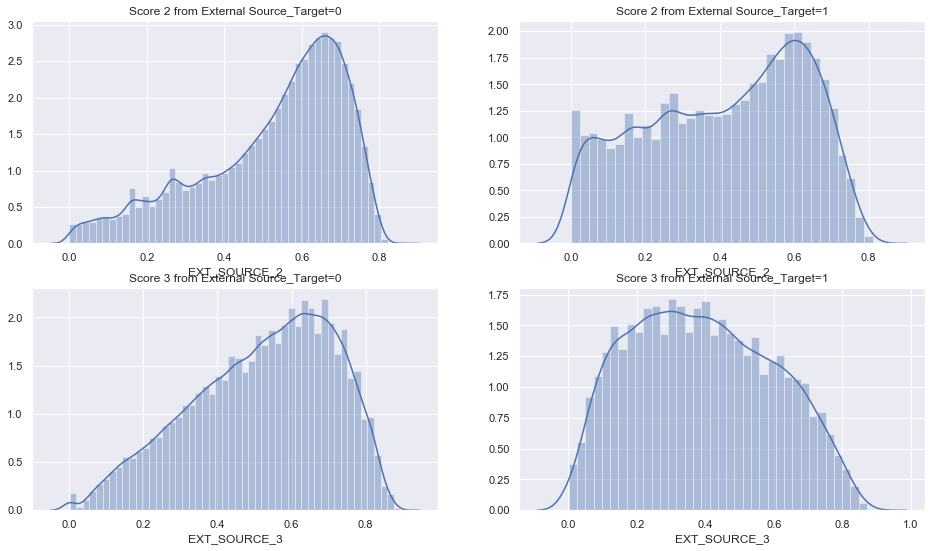

In [68]:
# First we will perform univariate analysis for columns with numerical values Comparing df_target_zero to df_target_one

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})
# Extenal SourCE Score 2 comparison
plt.subplot(2, 2, 1)
plt.title('Score 2 from External Source_Target=0')
sns.distplot(df_target_zero['EXT_SOURCE_2'])


plt.subplot(2, 2, 2)
plt.title('Score 2 from External Source_Target=1')
sns.distplot(df_target_one['EXT_SOURCE_2'])

# Extenal SourCE Score 3 comparison
plt.subplot(2, 2, 3)
plt.title('Score 3 from External Source_Target=0')
sns.distplot(df_target_zero['EXT_SOURCE_3'])


plt.subplot(2, 2, 4)
plt.title('Score 3 from External Source_Target=1')
sns.distplot(df_target_one['EXT_SOURCE_3'])

plt.show()

##### By above mentioned analysis its quite evident that EXT_SOURCE 3 of Non defaulyer has inverse proportional to that of defaulters and for EXT Source 2 the relation is inverse proportional but not as strong as EXT Source 3.
##### Another interpretation of this analysis is that the people with EXT SCORE3 & EXT SCORE 2 values less than 0.4 are most likely to deafult on loans

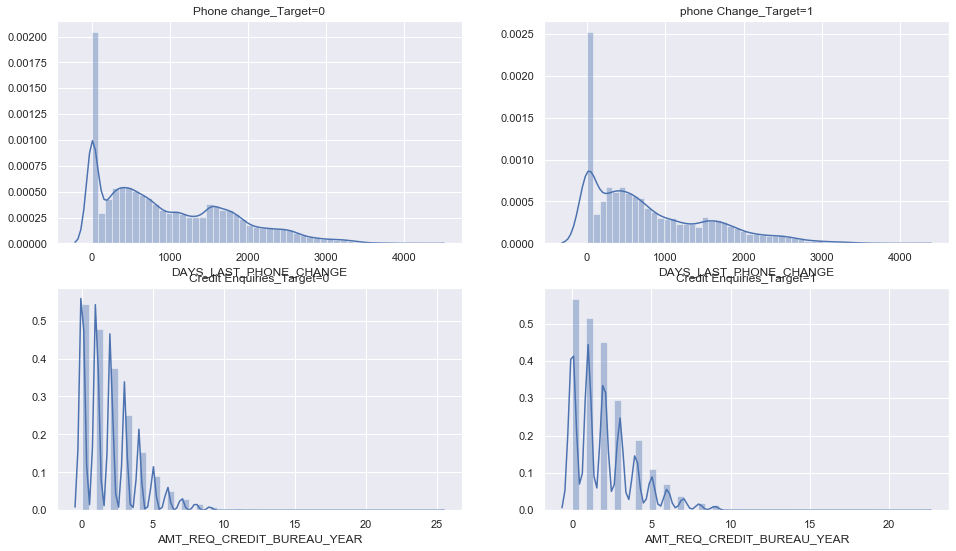

In [69]:
# First we will perform univariate analysis for columns with numerical values Comparing df_target_zero to df_target_one

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})
# Days phone chnaged comparison
plt.subplot(2, 2, 1)
plt.title('Phone change_Target=0')
sns.distplot(df_target_zero['DAYS_LAST_PHONE_CHANGE'])


plt.subplot(2, 2, 2)
plt.title('phone Change_Target=1')
sns.distplot(df_target_one['DAYS_LAST_PHONE_CHANGE'])

# Credit eqnuiries comparison
plt.subplot(2, 2, 3)
plt.title('Credit Enquiries_Target=0')
sns.distplot(df_target_zero['AMT_REQ_CREDIT_BUREAU_YEAR'])


plt.subplot(2, 2, 4)
plt.title('Credit Enquiries_Target=1')
sns.distplot(df_target_one['AMT_REQ_CREDIT_BUREAU_YEAR'])

plt.show()

##### Nothing Conclusive can be determined by the above analysis, so we will move towrads univariate analysis for Categorical Variables

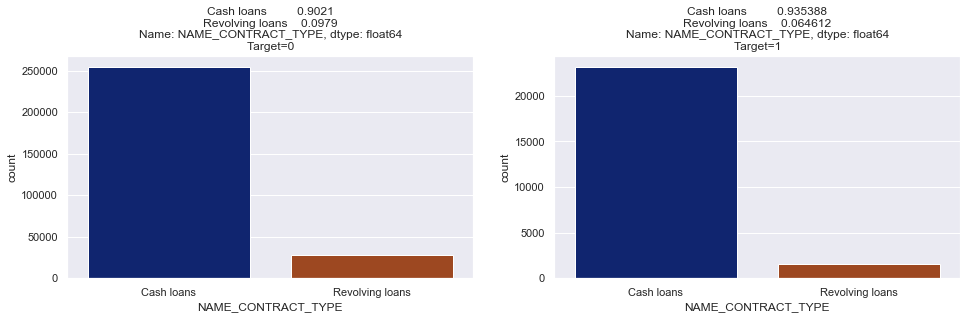

In [70]:
# First we will perform univariate analysis for columns with Categorical values Comparing df_target_zero to df_target_one

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})
# Loan Type comparison
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['NAME_CONTRACT_TYPE'].value_counts(normalize=True)) +"\nTarget=0")
sns.countplot(x='NAME_CONTRACT_TYPE', data=df_target_zero, palette="dark")


plt.subplot(2, 2, 2)
plt.title(str(df_target_one['NAME_CONTRACT_TYPE'].value_counts(normalize=True)) +"\nTarget=1")
sns.countplot(x='NAME_CONTRACT_TYPE',data=df_target_one, palette="dark")


plt.show()

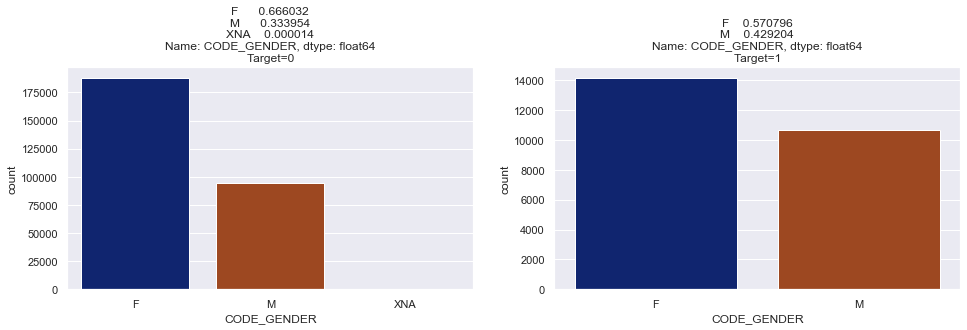

In [71]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# Gender comparison
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['CODE_GENDER'].value_counts(normalize=True)) +"\nTarget=0")
sns.countplot(x='CODE_GENDER', data=df_target_zero, palette="dark", order= df_target_zero['CODE_GENDER'].value_counts(ascending=False).index)


plt.subplot(2, 2, 2)
plt.title(str(df_target_one['CODE_GENDER'].value_counts(normalize=True)) +"\nTarget=1")
sns.countplot(x='CODE_GENDER',data=df_target_one, palette="dark", order = df_target_one['CODE_GENDER'].value_counts(ascending=False).index)

plt.show()

##### By analysing above plots we can says that there is slight evidence that the defaulters to be inclined towards the cash loans because the # increase in cash loans is ~3.5% (from 90.2% to 93.5 % ).
##### Simillarly  from by comparing the gender for Target=0 and Target=1 we find an % increase of ~9% (from 33.4% to 43% ) for male clients. Thiis Indicates that in certain scenarios male clients are most likely default on loan repayment.

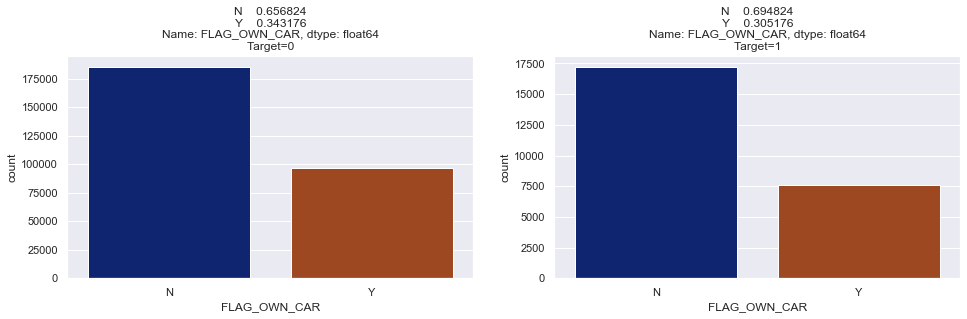

In [72]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# Does the applicant needs loan to buy a car :: comparison
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['FLAG_OWN_CAR'].value_counts(normalize=True)) +"\nTarget=0")
sns.countplot(x='FLAG_OWN_CAR', data=df_target_zero, palette="dark")


plt.subplot(2, 2, 2)
plt.title(str(df_target_one['FLAG_OWN_CAR'].value_counts(normalize=True)) +"\nTarget=1")
sns.countplot(x='FLAG_OWN_CAR',data=df_target_one, palette="dark")

plt.show()

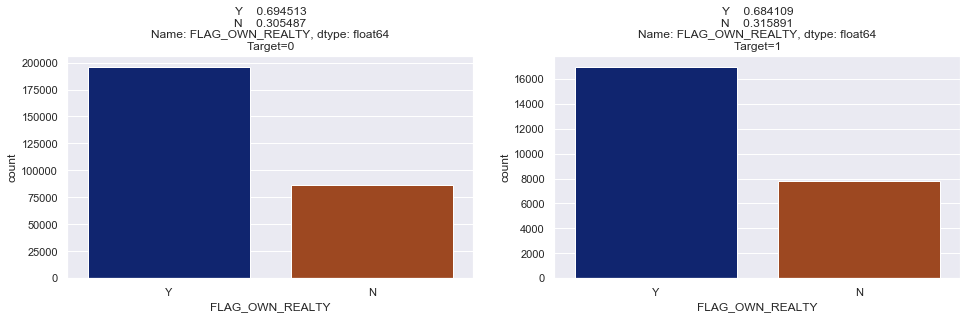

In [73]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# Does the applicant need loan to buy a real estate :: comparison
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['FLAG_OWN_REALTY'].value_counts(normalize=True)) +"\nTarget=0")
sns.countplot(x='FLAG_OWN_REALTY', data=df_target_zero, palette="dark",order= df_target_zero['FLAG_OWN_REALTY'].value_counts(ascending=False).index)


plt.subplot(2, 2, 2)
plt.title(str(df_target_one['FLAG_OWN_REALTY'].value_counts(normalize=True)) +"\nTarget=1")
sns.countplot(x='FLAG_OWN_REALTY',data=df_target_one, palette="dark",order= df_target_one['FLAG_OWN_REALTY'].value_counts(ascending=False).index)

plt.show()

##### No significant insight can be derived from above analysis

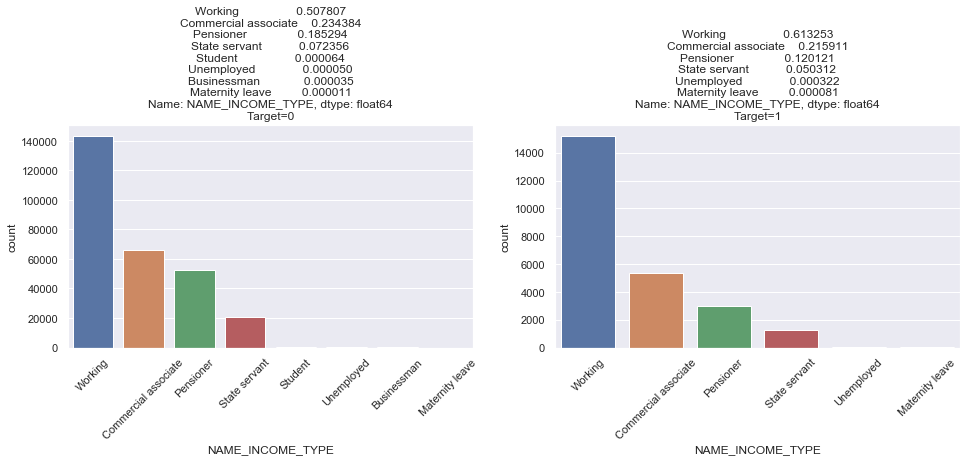

In [74]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['NAME_INCOME_TYPE'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='NAME_INCOME_TYPE', data=df_target_zero, order= df_target_zero['NAME_INCOME_TYPE'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['NAME_INCOME_TYPE'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='NAME_INCOME_TYPE',data=df_target_one,order= df_target_one['NAME_INCOME_TYPE'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)

plt.show()

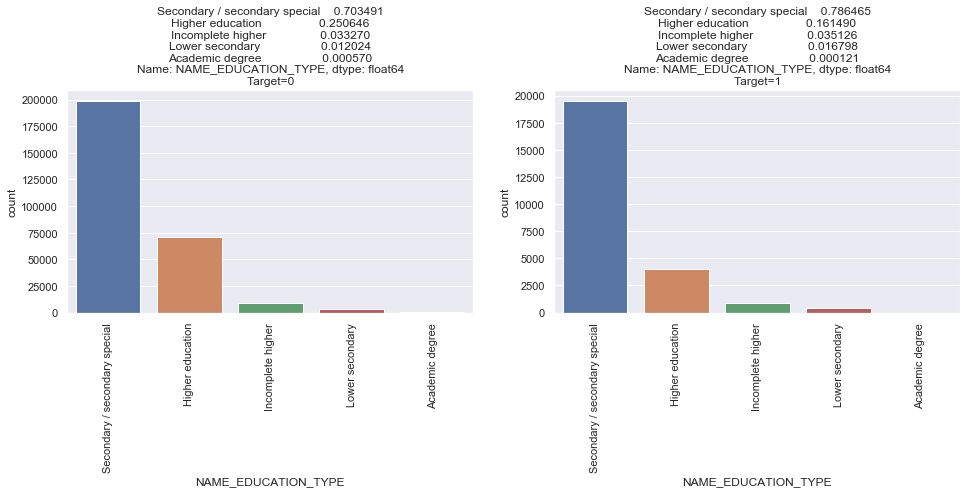

In [75]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['NAME_EDUCATION_TYPE'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='NAME_EDUCATION_TYPE', data=df_target_zero, order= df_target_zero['NAME_EDUCATION_TYPE'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['NAME_EDUCATION_TYPE'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='NAME_EDUCATION_TYPE',data=df_target_one,order= df_target_one['NAME_EDUCATION_TYPE'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

plt.show()

##### By above analysis it is quite evident that people with secondery education only are more like to default on lona repayment. The count for people defaulting on loan increases by ~8% (70% to 78.5 %) for folks with only secodary education, hwoever, analysis also shows that clients with higher education and Academic degree are less likely to defauly on loan


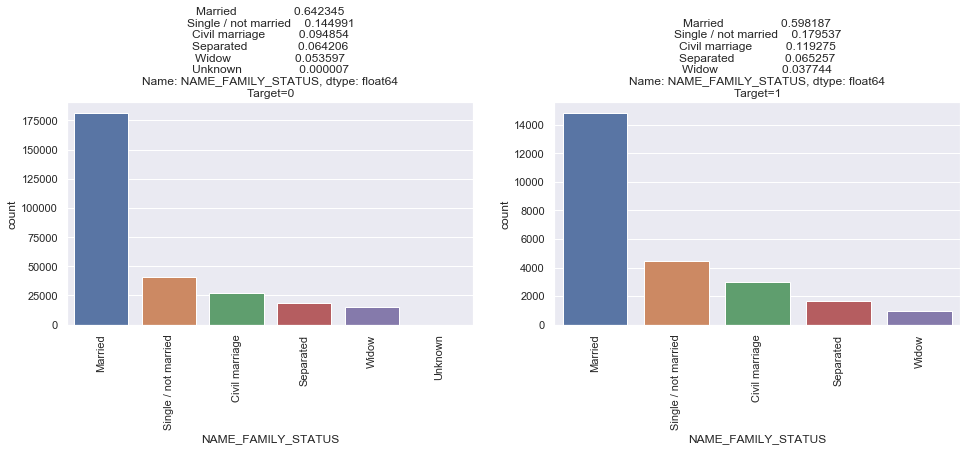

In [76]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['NAME_FAMILY_STATUS'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='NAME_FAMILY_STATUS', data=df_target_zero, order= df_target_zero['NAME_FAMILY_STATUS'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['NAME_FAMILY_STATUS'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='NAME_FAMILY_STATUS',data=df_target_one,order= df_target_one['NAME_FAMILY_STATUS'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

plt.show()

##### Above analysis gives very little indication that married poeple are less likely to default while sigle/unmarried people are more likley to default on loan

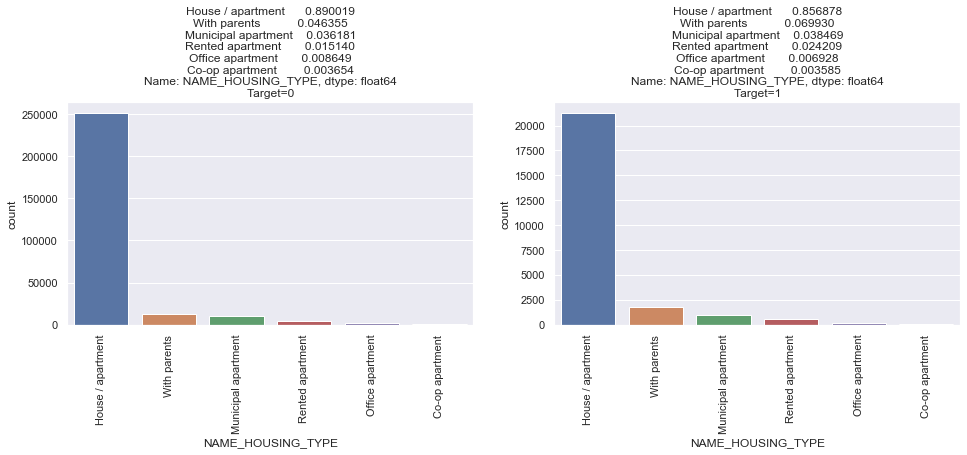

In [77]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['NAME_HOUSING_TYPE'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='NAME_HOUSING_TYPE', data=df_target_zero, order= df_target_zero['NAME_HOUSING_TYPE'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['NAME_HOUSING_TYPE'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='NAME_HOUSING_TYPE',data=df_target_one,order= df_target_one['NAME_HOUSING_TYPE'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

plt.show()

##### The above analysis give very little indication that people living with parents and in rented apartment are more likley to default on loan

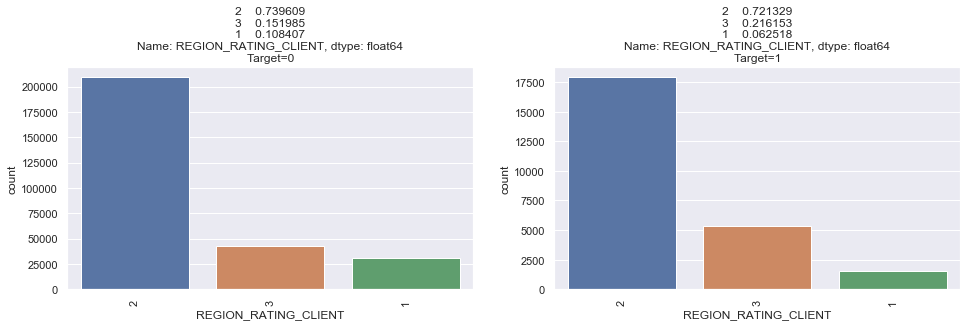

In [78]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['REGION_RATING_CLIENT'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='REGION_RATING_CLIENT', data=df_target_zero, order= df_target_zero['REGION_RATING_CLIENT'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['REGION_RATING_CLIENT'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='REGION_RATING_CLIENT',data=df_target_one,order= df_target_one['REGION_RATING_CLIENT'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

plt.show()

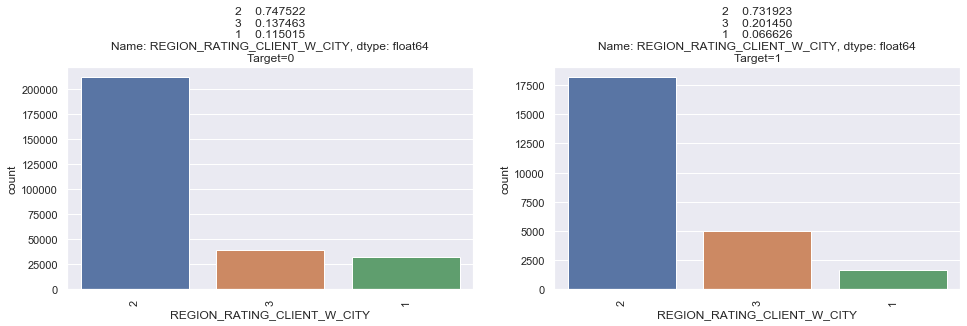

In [79]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='REGION_RATING_CLIENT_W_CITY', data=df_target_zero, order= df_target_zero['REGION_RATING_CLIENT_W_CITY'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='REGION_RATING_CLIENT_W_CITY',data=df_target_one,order= df_target_one['REGION_RATING_CLIENT_W_CITY'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

plt.show()

##### The above analysis shows a strong indication that people living in Region rated 3 are more likely to default on loan

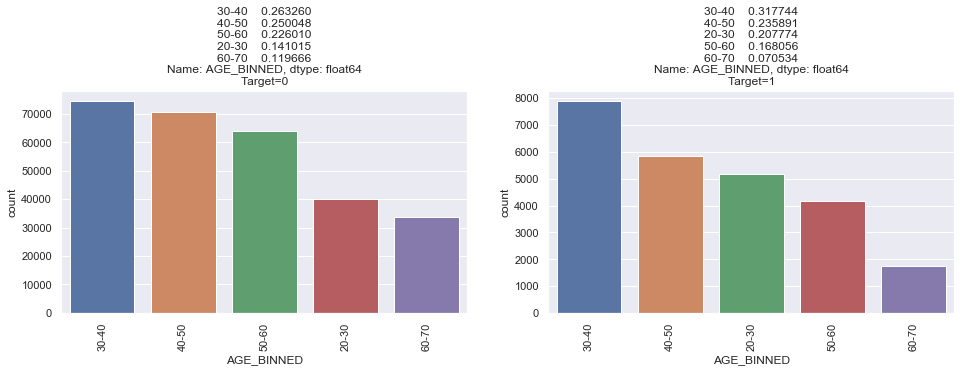

In [80]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['AGE_BINNED'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='AGE_BINNED', data=df_target_zero, order= df_target_zero['AGE_BINNED'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['AGE_BINNED'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='AGE_BINNED',data=df_target_one,order= df_target_one['AGE_BINNED'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

plt.show()

##### This analysis shows client in the age group of 20-30 and 30-40 are likley to default

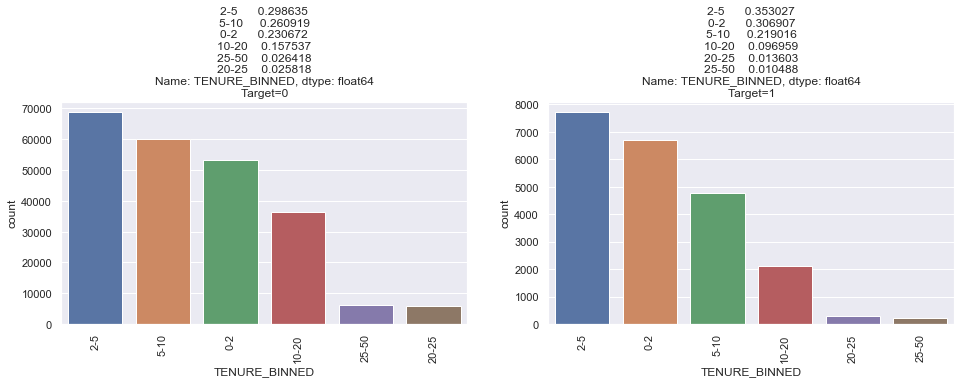

In [81]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['TENURE_BINNED'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='TENURE_BINNED', data=df_target_zero, order= df_target_zero['TENURE_BINNED'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['TENURE_BINNED'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='TENURE_BINNED',data=df_target_one,order= df_target_one['TENURE_BINNED'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

plt.show()

##### The above analysis clearly indicates that people with service tenure of 0-2 and 2-5 years are more likley to deafult on loans

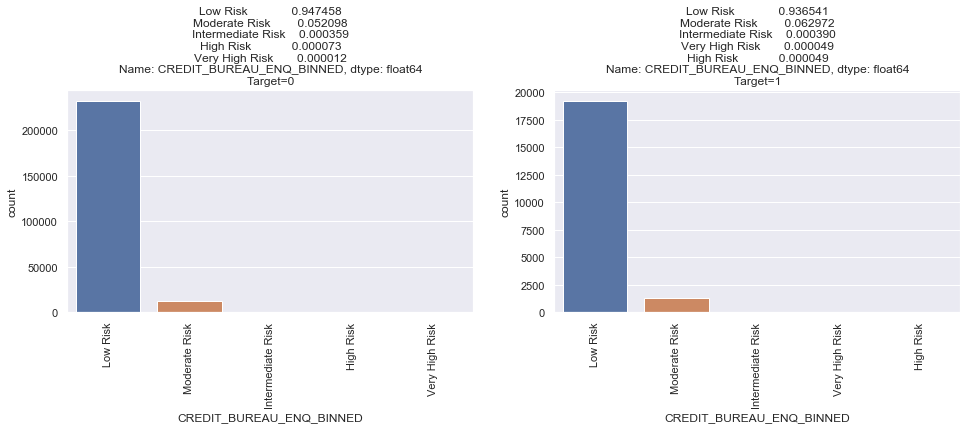

In [82]:
sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})


# What is the income source of the client
plt.subplot(2, 2, 1)
plt.title(str(df_target_zero['CREDIT_BUREAU_ENQ_BINNED'].value_counts(normalize=True)) +"\nTarget=0")
chart1 = sns.countplot(x='CREDIT_BUREAU_ENQ_BINNED', data=df_target_zero, order= df_target_zero['CREDIT_BUREAU_ENQ_BINNED'].value_counts(ascending=False).index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)



plt.subplot(2, 2, 2)
plt.title(str(df_target_one['CREDIT_BUREAU_ENQ_BINNED'].value_counts(normalize=True)) +"\nTarget=1")
chart2 = sns.countplot(x='CREDIT_BUREAU_ENQ_BINNED',data=df_target_one,order= df_target_one['CREDIT_BUREAU_ENQ_BINNED'].value_counts(ascending=False).index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

plt.show()

##### Nothing concrete comes out of this analysis

## 4d. Bivariate analysis

In [83]:
df_b = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_BINNED', 'TENURE_BINNED',
       'CREDIT_BUREAU_ENQ_BINNED']]

In [84]:
df_b.shape

(307511, 42)

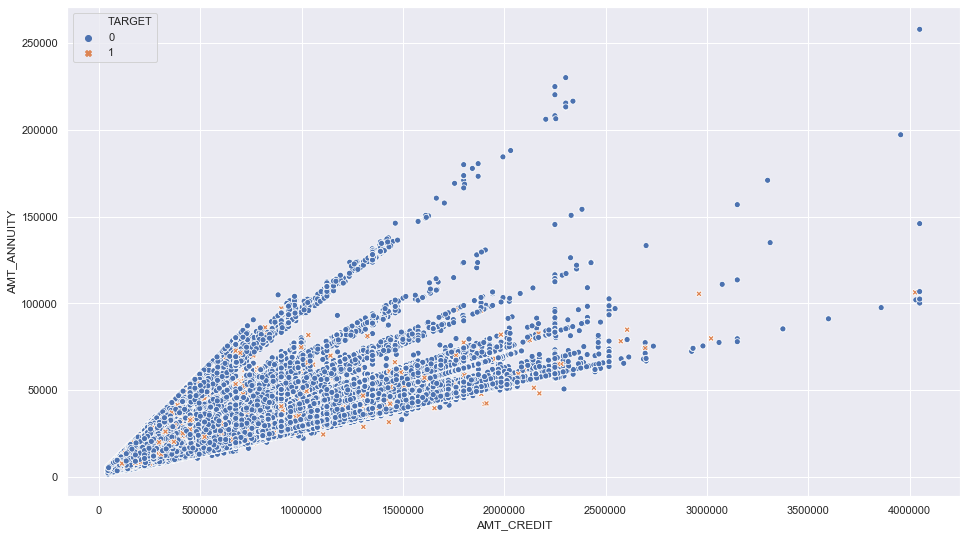

In [85]:
# AMT_CREDIT vs AMT_ANNUITY
sns.scatterplot(x ="AMT_CREDIT", y="AMT_ANNUITY",data=df_b, hue="TARGET", style="TARGET")
plt.show()

##### As it is quite evident that Credit Amount have a linear relationship with Annuity amount

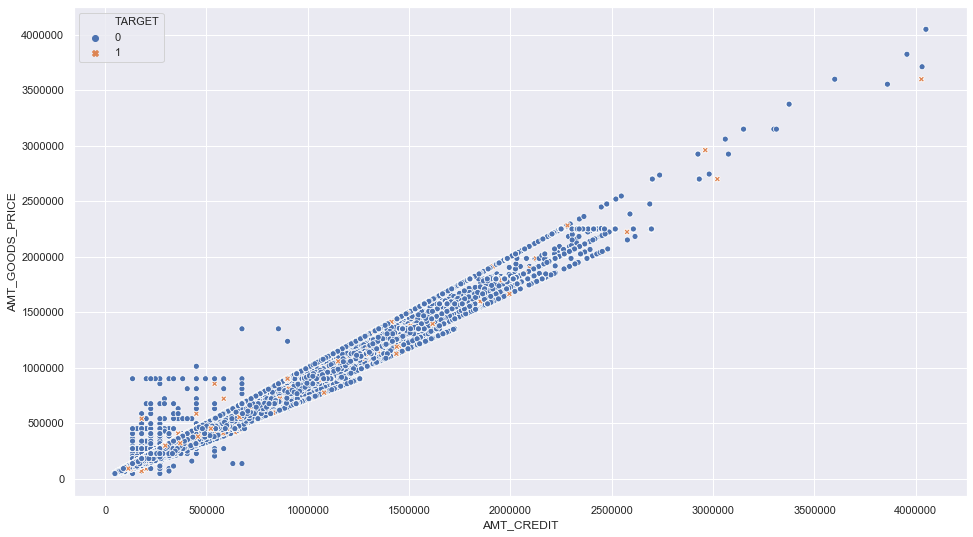

In [86]:
# AMT_CREDIT vs AMT_GOODS_PRICE
sns.scatterplot(x ="AMT_CREDIT", y="AMT_GOODS_PRICE",data=df_b, hue="TARGET", style="TARGET")
plt.show()

##### As it is quite evident that Credit Amount have a linear relationship with Goods price amount fro which loan is given, which is quite natural

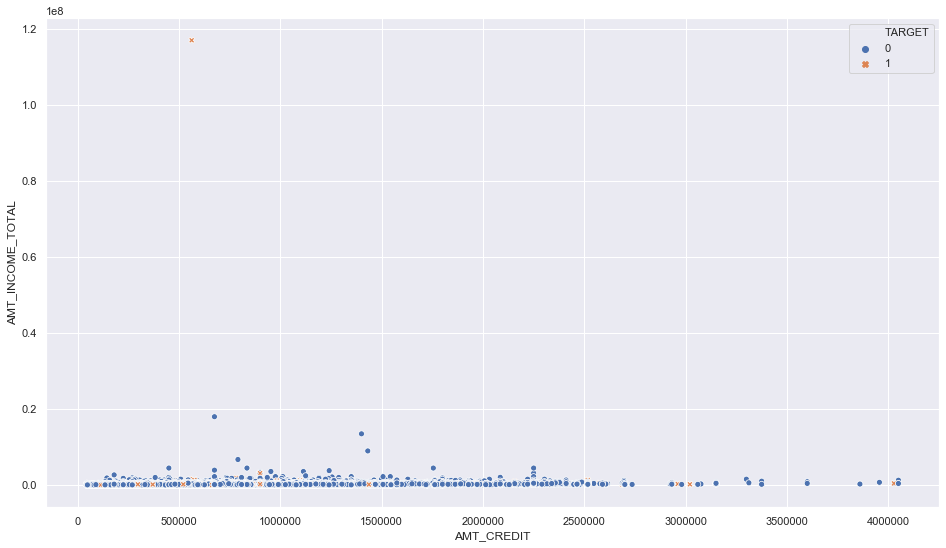

In [87]:
# AMT_CREDIT vs AMT_INCOME_TOTAL
sns.scatterplot(x ="AMT_CREDIT", y="AMT_INCOME_TOTAL",data=df_b, hue="TARGET", style="TARGET")
plt.show()

##### As we can see clearly that one outlier is distubing the whole scatter plot, so we will find out the value of this outlier from outlier detection section and handle it by removing the row

In [88]:
# The removing the extreme outlier
df_b = df_b[df_b['AMT_INCOME_TOTAL'] != 117000000]
df_b.shape

(307510, 42)

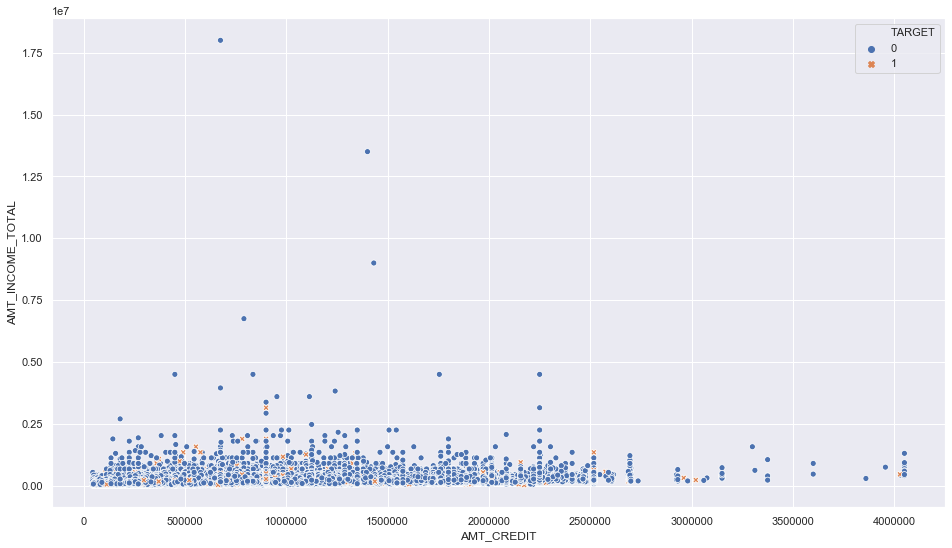

In [89]:
# AMT_CREDIT vs AMT_INCOME_TOTAL
sns.scatterplot(x ="AMT_CREDIT", y="AMT_INCOME_TOTAL",data=df_b, hue="TARGET", style="TARGET")
plt.show()

##### Aswe can clearly see that Income amount does not have linear relation ship with Credit amount

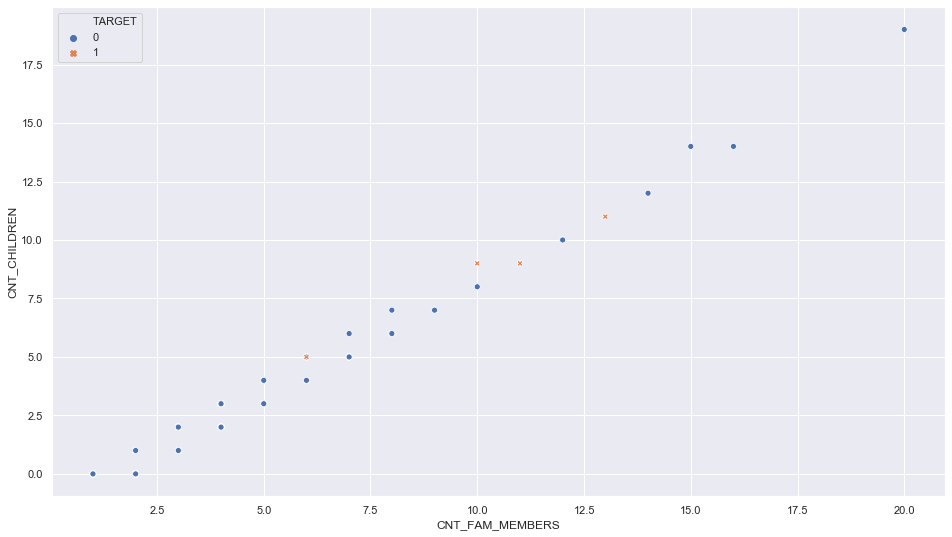

In [90]:
# CNT_FAM_MEMBER vs CNT_CHILDREN
sns.scatterplot(x ="CNT_FAM_MEMBERS", y="CNT_CHILDREN",data=df_b, hue="TARGET", style="TARGET")
plt.show()

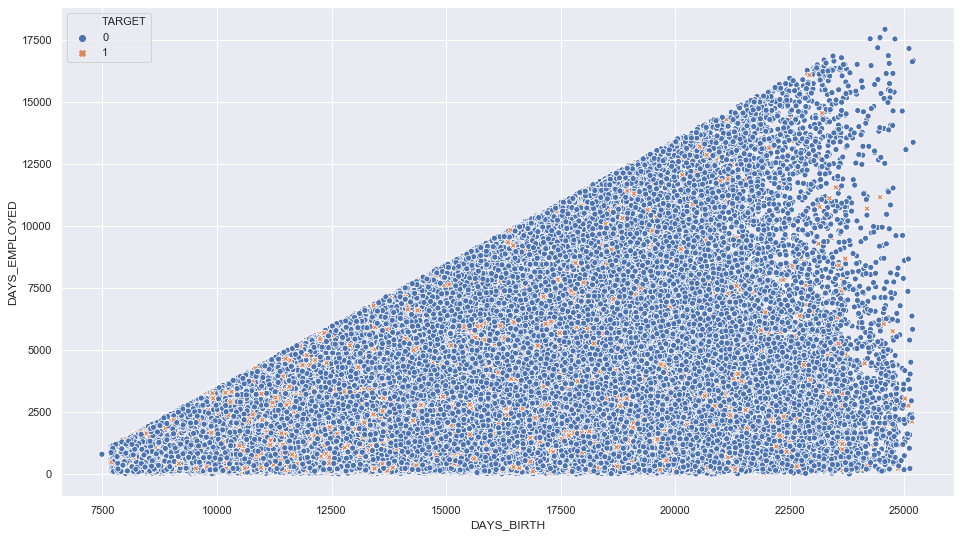

In [91]:
# CNT_FAM_MEMBER vs CNT_CHILDREN
sns.scatterplot(x ="DAYS_BIRTH", y="DAYS_EMPLOYED",data=df_b, hue="TARGET", style="TARGET")
plt.show()

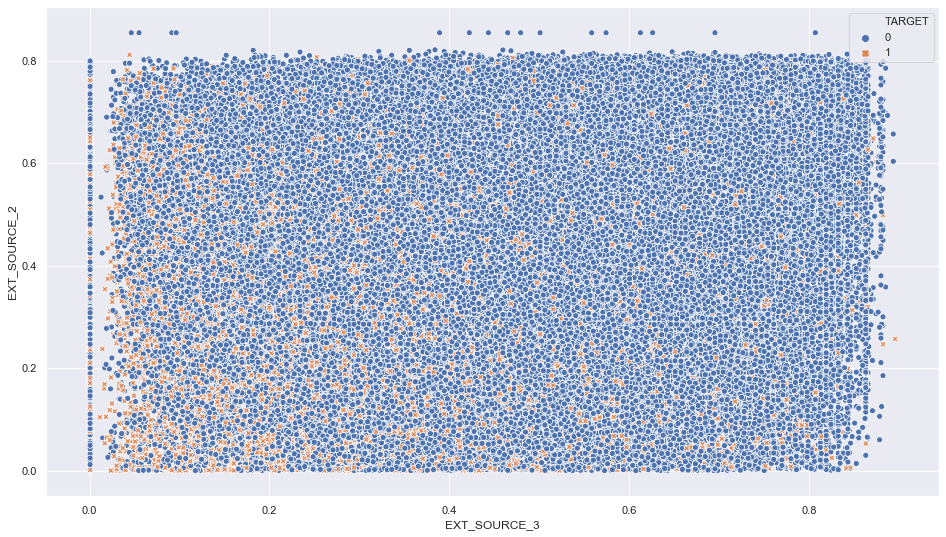

In [92]:
# EXT_SOURCE_2 vs EXT_SOURCE_3
sns.scatterplot(x ="EXT_SOURCE_3", y="EXT_SOURCE_2",data=df_b, hue="TARGET", style="TARGET")
plt.show()

##### The above scatter plot confirms that the default cases (TARGET=1) are stacked at the lower values and the non defaults cased are stacked at the higher values. By this we can ascertain that higher the score of external source lower the possbility of default

##### As we can clearly see that family count and children count, Age vs tenure (the numerical variables have) braodly linear relation ship with eahc other 

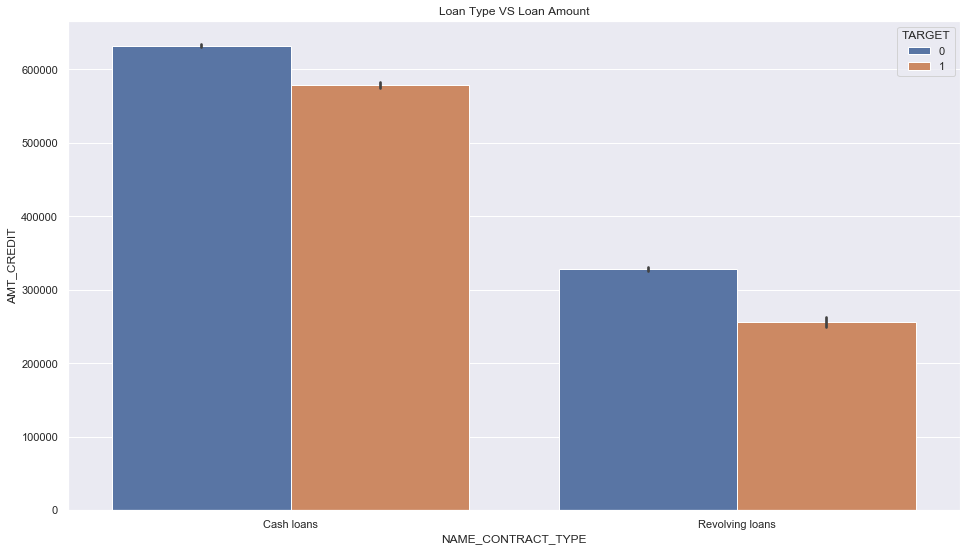

In [93]:
# First we will perform Bivariate analysis for columns 

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(16,9)})
plt.title('Loan Type VS Loan Amount')
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', hue="TARGET", data=df_b)
plt.show()

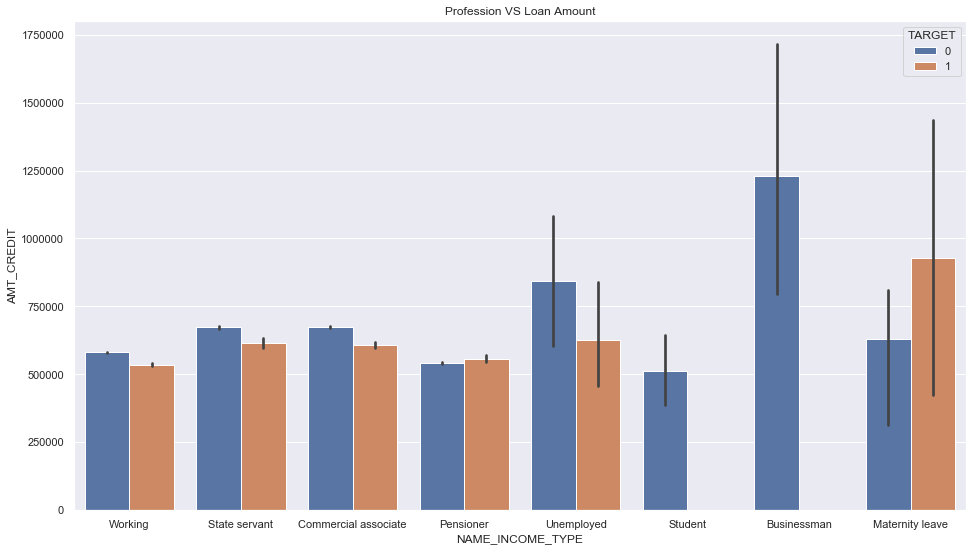

In [94]:
plt.title('Profession VS Loan Amount')
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', hue="TARGET", data=df_b)
plt.show()

##### As it is clear from the plot that businessmans does not defaults on loan, people on maternity leave are likely to default and get higher 

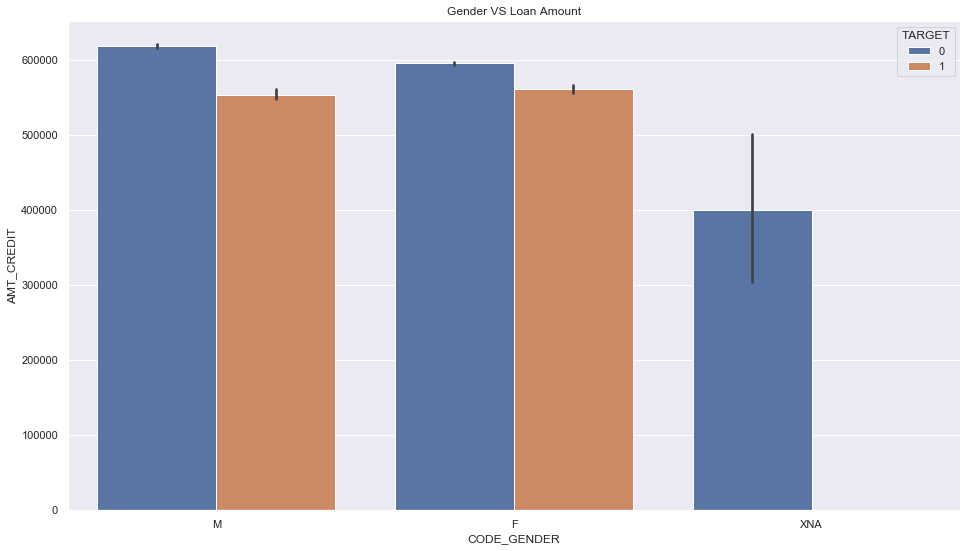

In [95]:
plt.title('Gender VS Loan Amount')
sns.barplot(x='CODE_GENDER', y='AMT_CREDIT', hue="TARGET", data=df_b)
plt.show()

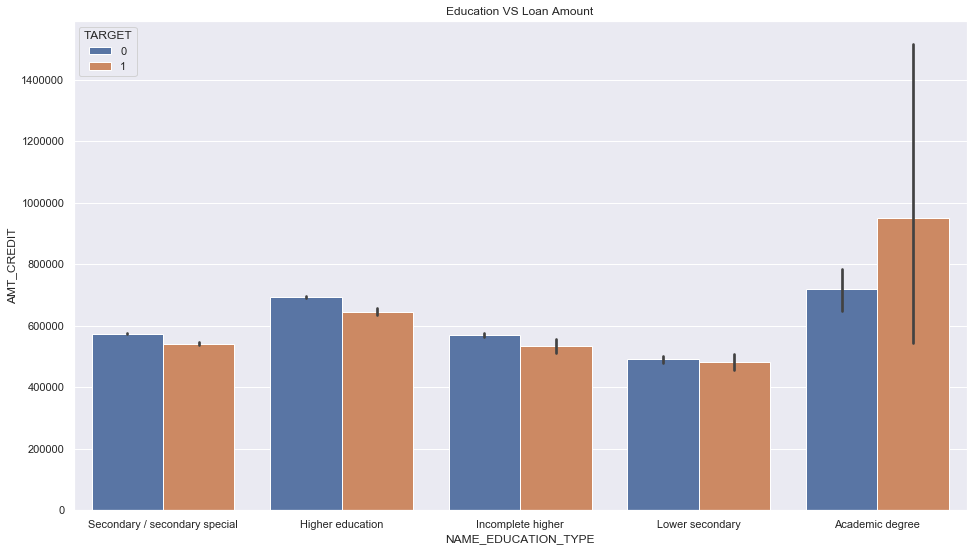

In [96]:
plt.title('Education VS Loan Amount')
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue="TARGET", data=df_b)
plt.show()

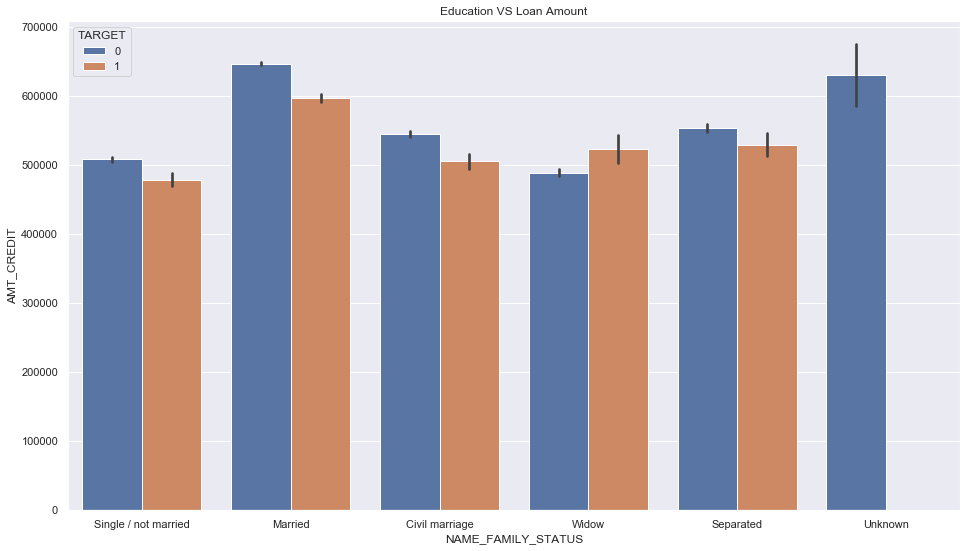

In [97]:
plt.title('Education VS Loan Amount')
sns.barplot(x='NAME_FAMILY_STATUS', y='AMT_CREDIT', hue="TARGET", data=df_b)
plt.show()

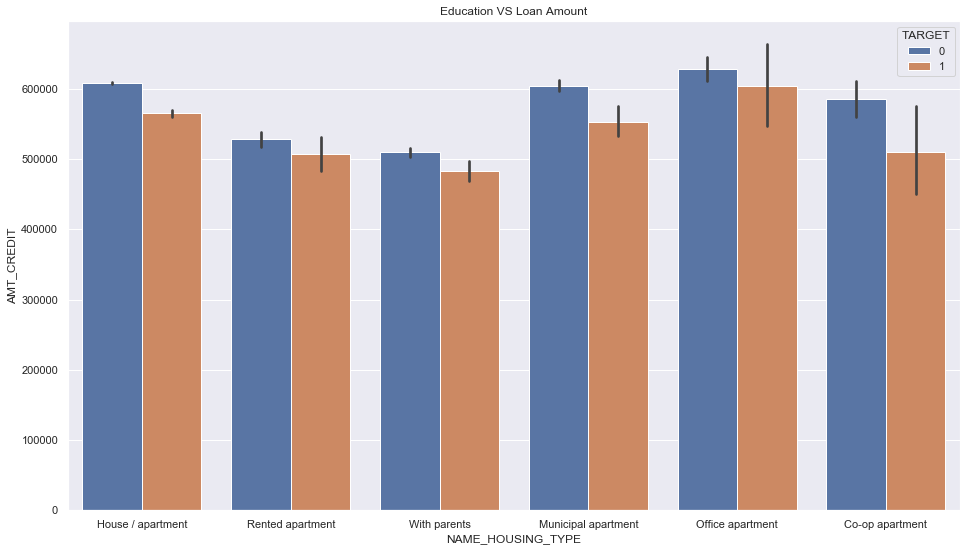

In [98]:
plt.title('Education VS Loan Amount')
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT', hue="TARGET", data=df_b)
plt.show()

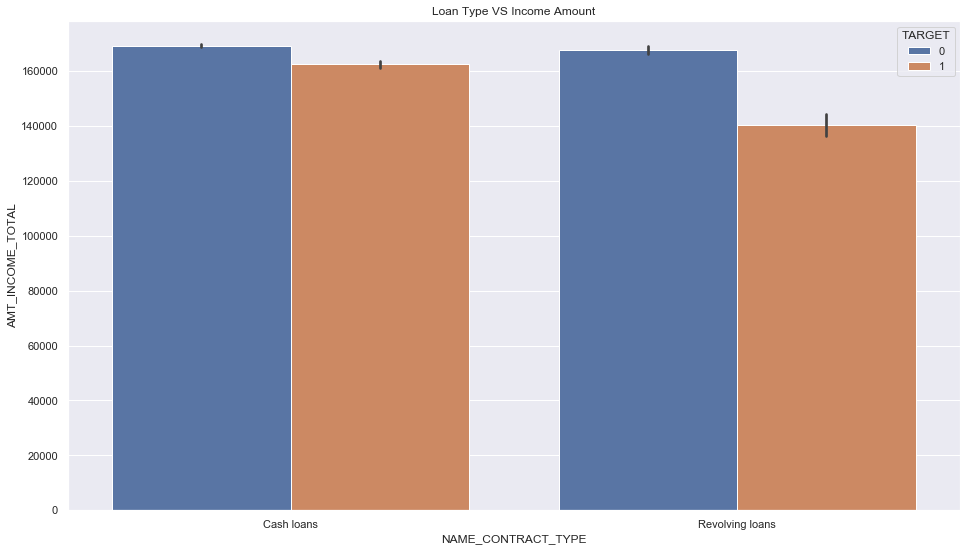

In [99]:
# Loan Type vs Income Amount
plt.title('Loan Type VS Income Amount')
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_INCOME_TOTAL', hue="TARGET", data=df_b)
plt.show()

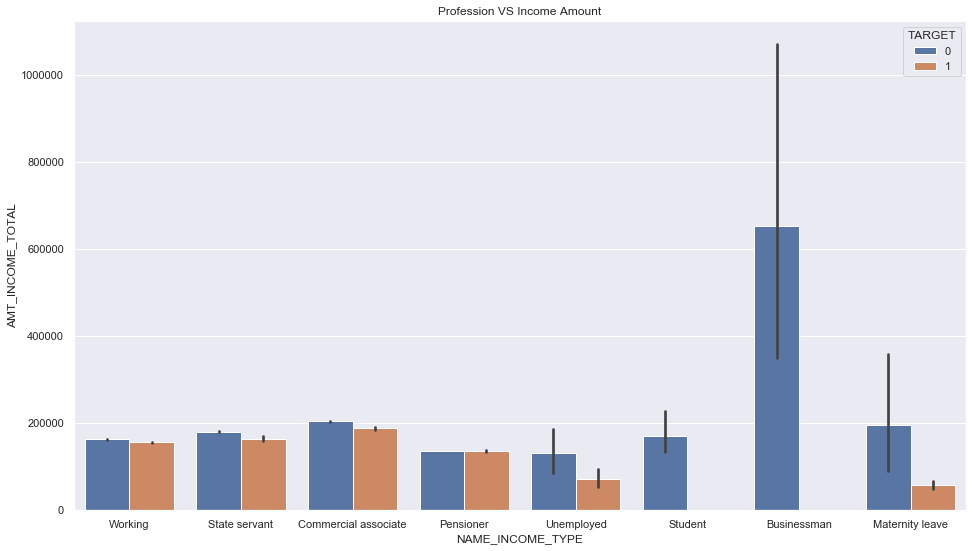

In [100]:
#Profession vs Income Amount
plt.title('Profession VS Income Amount')
sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue="TARGET", data=df_b)
plt.show()

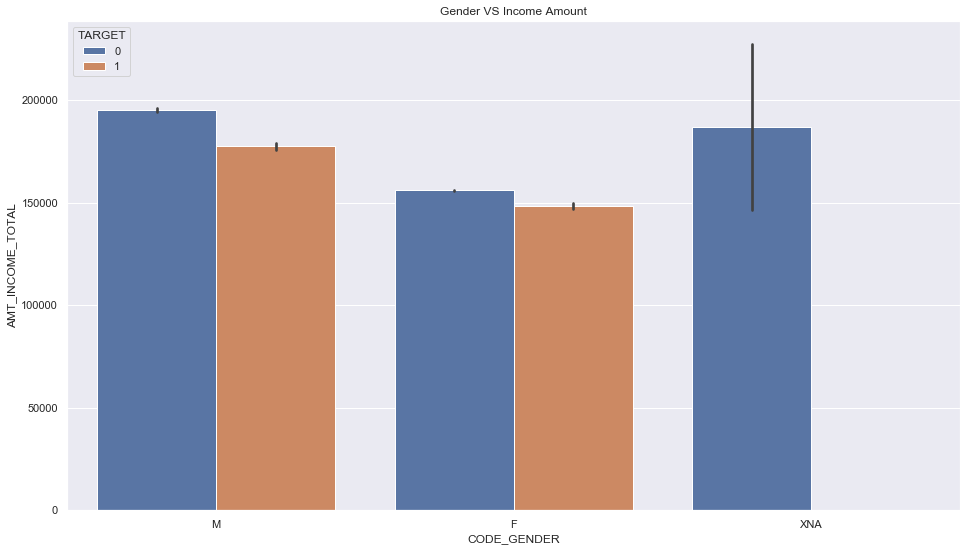

In [101]:
#Gender vs Income Amount
plt.title('Gender VS Income Amount')
sns.barplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', hue="TARGET", data=df_b)
plt.show()

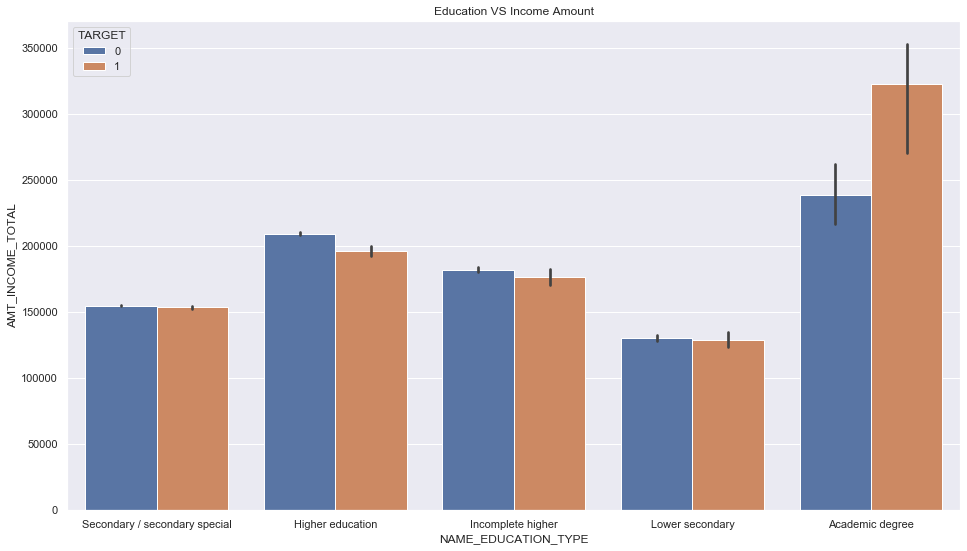

In [102]:
#Education vs Income Amount
plt.title('Education VS Income Amount')
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue="TARGET", data=df_b)
plt.show()

##### By This we have come to an end to the bivariate analyis, but bivariate analysis has provided us with some natural relational insights , but to understand the relation further we have to get the pearson coefficient of correlation in these data set with TARGET variable

## 4e. Correlation 

In [103]:
df_target_zero.shape

(282686, 42)

In [104]:
df_target_one.shape

(24825, 42)

In [105]:
# Now we will find the correlation betweem the TARGET variable and all other numeric variables 

df_corr = df_b.corr()
# df_0_corr
df_corr_TARGET = df_corr['TARGET'].sort_values()
# df_corr_TARGET
print('+ve corr: \n{0}'.format(df_corr_TARGET.tail(10)))
print('-ve corr: \n{0}'.format(df_corr_TARGET.head(10)))

+ve corr: 
OBS_60_CNT_SOCIAL_CIRCLE       0.009029
OBS_30_CNT_SOCIAL_CIRCLE       0.009137
CNT_FAM_MEMBERS                0.009298
CNT_CHILDREN                   0.019179
AMT_REQ_CREDIT_BUREAU_YEAR     0.019937
DEF_60_CNT_SOCIAL_CIRCLE       0.031280
DEF_30_CNT_SOCIAL_CIRCLE       0.032252
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060894
TARGET                         1.000000
Name: TARGET, dtype: float64
-ve corr: 
EXT_SOURCE_3                 -0.178898
EXT_SOURCE_2                 -0.160453
DAYS_BIRTH                   -0.078232
DAYS_EMPLOYED                -0.074952
DAYS_LAST_PHONE_CHANGE       -0.055207
DAYS_ID_PUBLISH              -0.051463
DAYS_REGISTRATION            -0.041981
AMT_GOODS_PRICE              -0.039644
REGION_POPULATION_RELATIVE   -0.037220
AMT_CREDIT                   -0.030369
Name: TARGET, dtype: float64


##### The simplest analysis to evalute which are the most important features relevant to TARGET is correlation. We obtain a correlation matrix of the full dataset, and sort it to see the features that have the highest positive and negative correlation with TARGET.

##### For +ve correlation, REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY are highest, but have a low magnitude since correlation is around 0.06.

###### For -ve correlation, we have sronger results as the EXT_SOURCE_3, EXT_SOURCE_2, DAYS_BIRTH  and  DAYS_EMPLOYED  are between -0.07 to -0.18.

## 4f. Univariate, Bivariate & Multivariate analysis for variables with very high +ve and -ve correlation

##### We extract the list of top 10 positive and negatively correlated features to TARGET and plot the graphical KDEs/Histograms to see how the shapes of the TARGET=1 and TARGET=0 population distributions differ for these more salient features.

In [106]:
var_pos_corr = df_corr_TARGET.head(10).index.values
var_neg_corr = df_corr_TARGET[-2:-10:-1].index.values

print(var_pos_corr)
print(var_neg_corr)

['EXT_SOURCE_3' 'EXT_SOURCE_2' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_LAST_PHONE_CHANGE' 'DAYS_ID_PUBLISH' 'DAYS_REGISTRATION'
 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'AMT_CREDIT']
['REGION_RATING_CLIENT_W_CITY' 'REGION_RATING_CLIENT'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'DEF_60_CNT_SOCIAL_CIRCLE'
 'AMT_REQ_CREDIT_BUREAU_YEAR' 'CNT_CHILDREN' 'CNT_FAM_MEMBERS'
 'OBS_30_CNT_SOCIAL_CIRCLE']


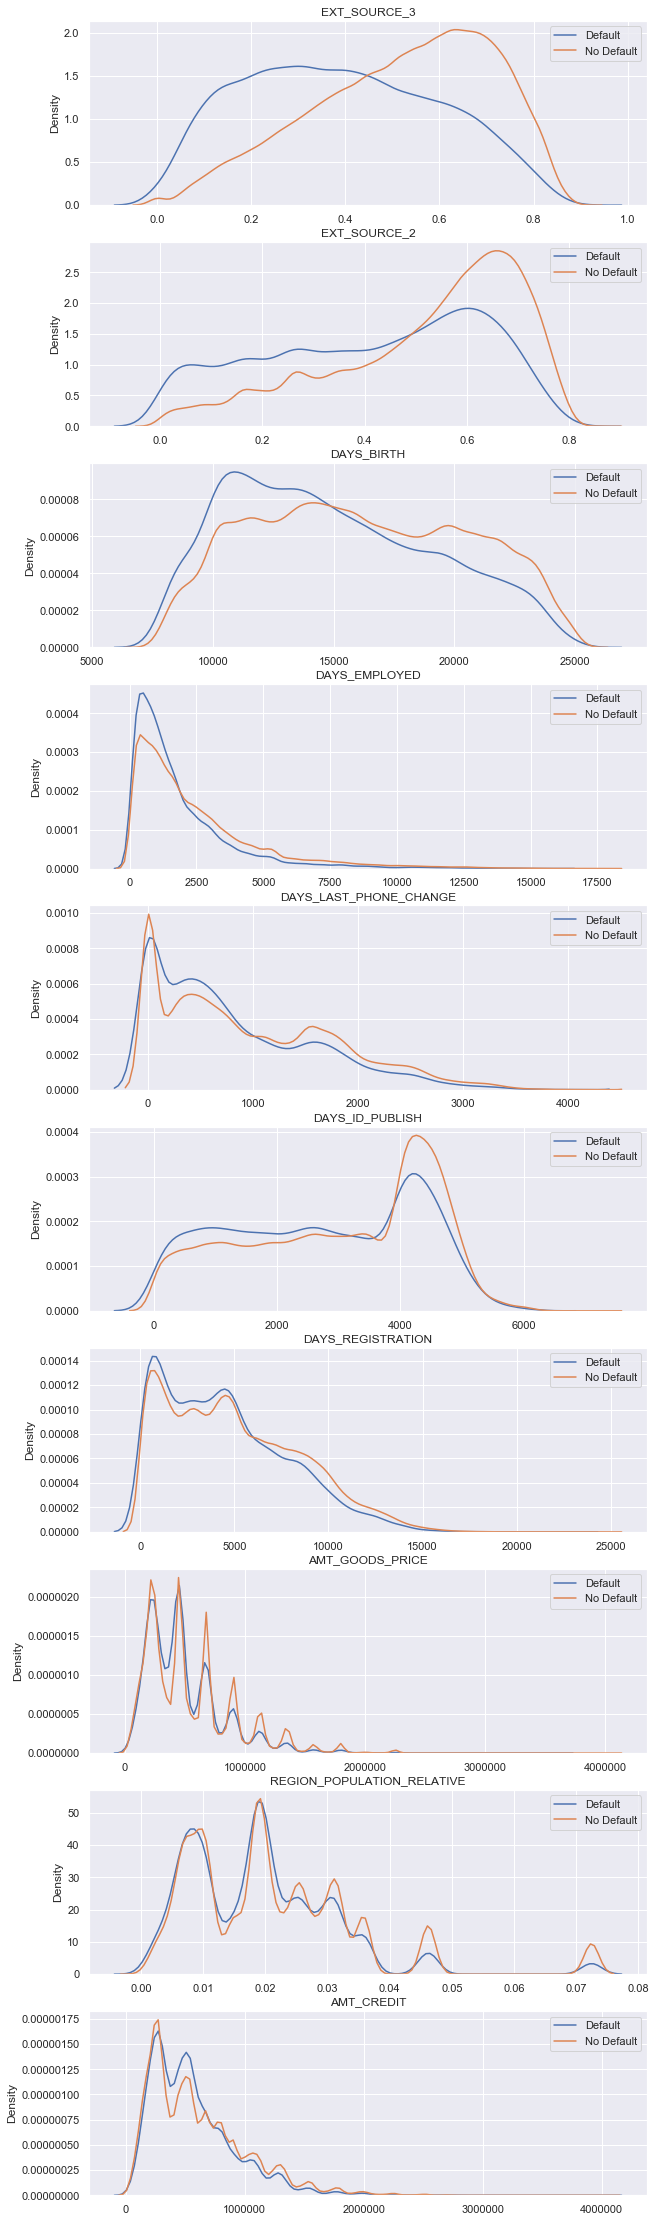

In [107]:
numVar = var_pos_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_pos_corr):    
    dflt_var = df_b.loc[df_b['TARGET']==1,var]
    dflt_non_var = df_b.loc[df_b['TARGET']==0,var]
    
    plt.subplot(numVar,1,i+1)
    sns.kdeplot(dflt_var,label='Default')
    sns.kdeplot(dflt_non_var,label='No Default')
    #plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(var)

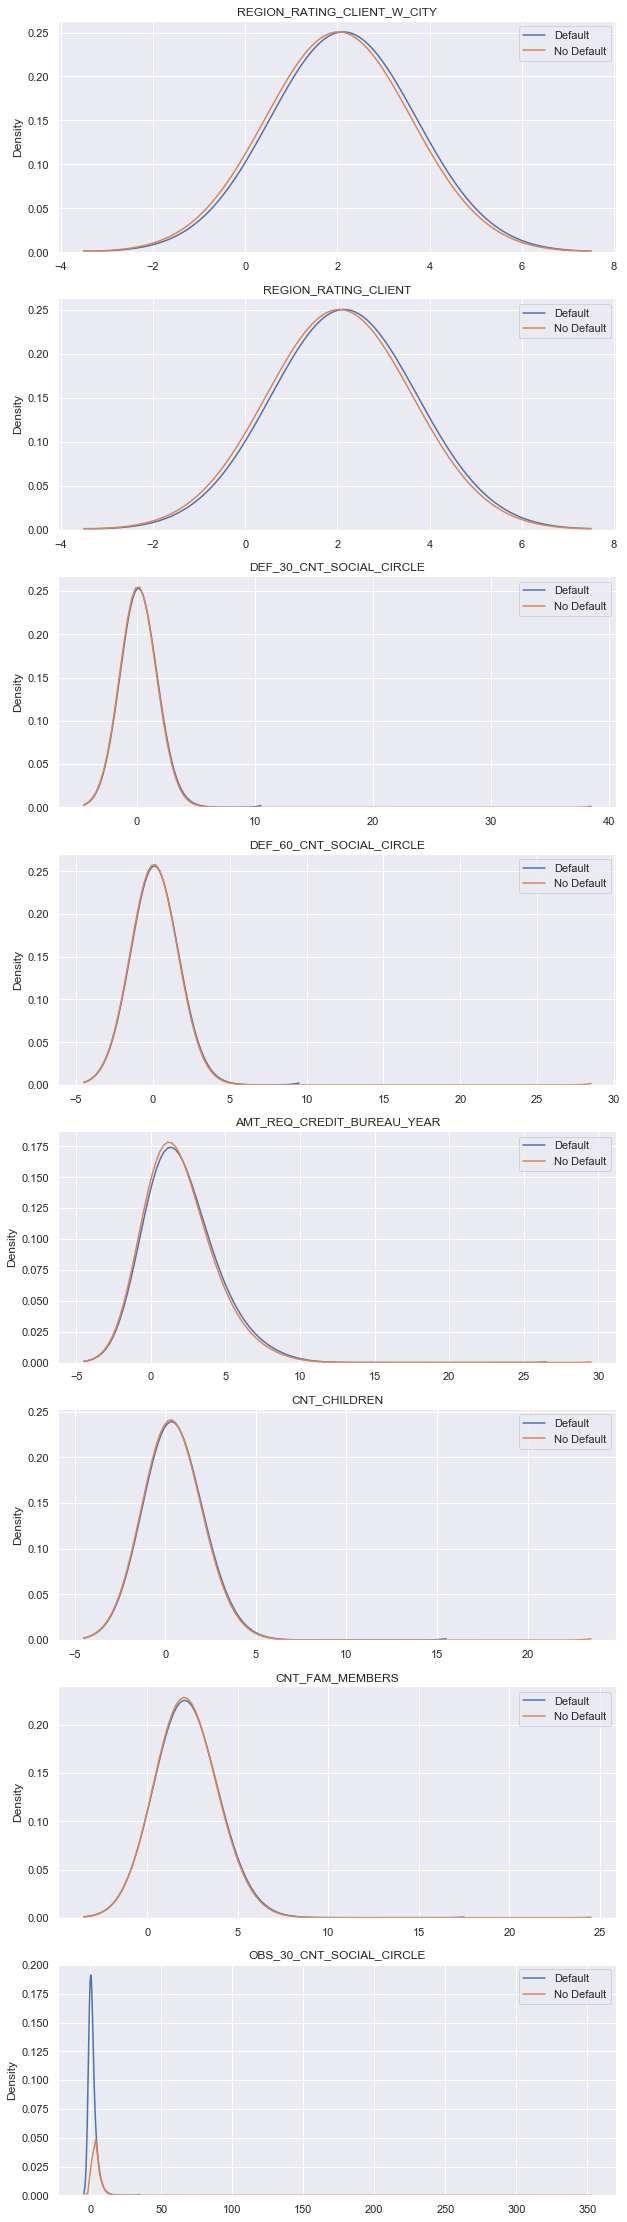

In [108]:
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_neg_corr):    
    dflt_var = df_b.loc[df_b['TARGET']==1,var]
    dflt_non_var = df_b.loc[df_b['TARGET']==0,var]
    
    plt.subplot(numVar,1,i+1)
    sns.kdeplot(dflt_var,label='Default', bw=1.5)
    sns.kdeplot(dflt_non_var,label='No Default', bw=1.5)
    #plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(var)

##### We saw that external sources had the highest correlations with TARGET, followed by DAYS_BIRTH and DAYS_EMPLOYED. So we want to take a closer look at these features and their interplay with TARGET.

### Graphical Analysis of the most important features

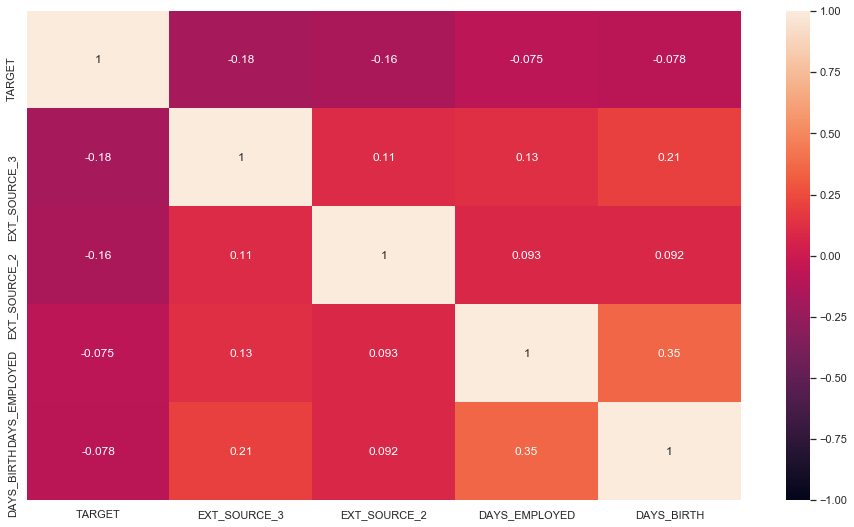

In [109]:
# Creating a heatmap to understand the 
df_ext_src = df_b[['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','DAYS_EMPLOYED','DAYS_BIRTH']] 
df_ext_src_corr = df_ext_src.corr()
sns.heatmap(df_ext_src_corr,vmin=-1.0,vmax=1.0,annot=True)

#### Summary of the Heat Map
#### -ve Correlation :- This means with decrease in the value of these variables the chances of client defaulting on loan increases
#### EXT_SOURCE_3 -0.178898
#### EXT_SOURCE_2 -0.160453
#### DAYS_BIRTH -0.078232
#### DAYS_EMPLOYED -0.074952


### Additional Graphical Analysis 

##### We want to create a pairplot and a pairgrid to have a graphical analysis of the most important features of the dataset. As the original dataset is quite large, we take a sample of it such that we remove all the rows that have NaN and then take a random sample of 10000 points.

#### We have a 6x6 grid inpairplot as TARGET is explicitly considered.

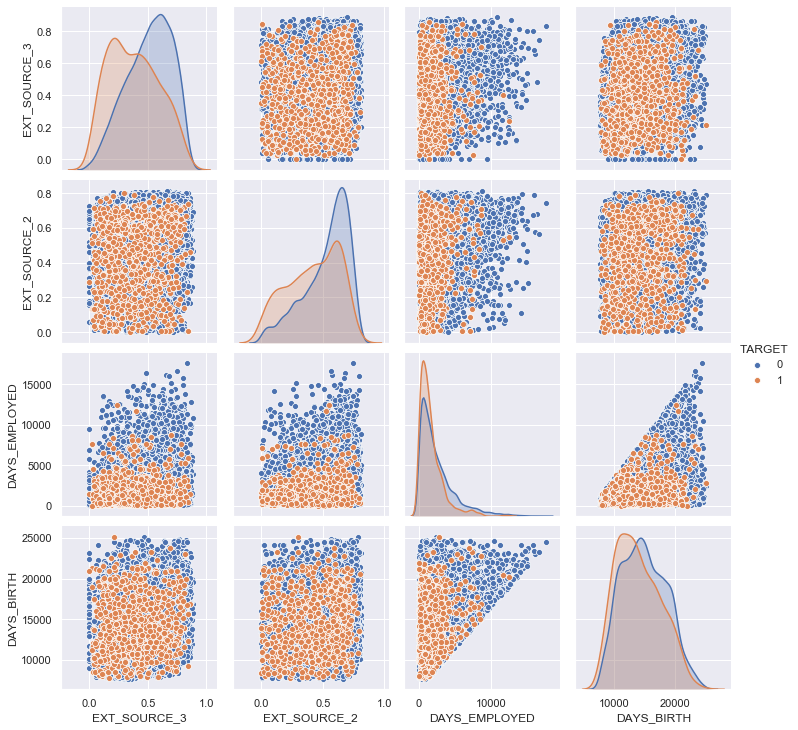

In [110]:
df_ext_src.shape
df_ext_src_sample = df_ext_src.dropna().sample(10000)
sns.pairplot(df_ext_src_sample, hue="TARGET")

##### We use pairgrid to create a more informative plot. In this pairgrid TARGET is denoted by the hue. Orange is TARGET==1 (default), and Blue is TARGET==0 (no default).

##### The pairgrid can be explained as follows:

#### Upper triangle: This is a scatter plot between the two variables in the X & Y axes, and has the TARGET variable as a different hue.
#### Diagonal: This is a kde plot of the distribution of each variable
#### Bottom triangle: This is a kde plot

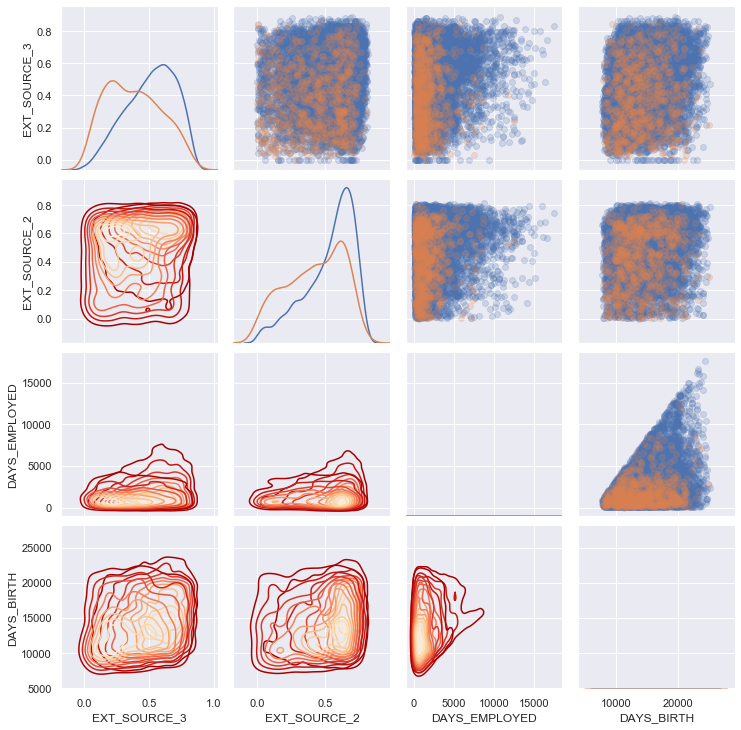

In [111]:
grid = sns.PairGrid(data = df_ext_src_sample, diag_sharey=True,
                    hue = 'TARGET', 
                    vars = [x for x in list(df_ext_src_sample.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

# 5. Read Previous Application data

In [112]:
df_prev = pd.read_csv("previous_application.csv")
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

## 5a. Inspection of Previous Application data

Text(0, 0.5, 'Count')

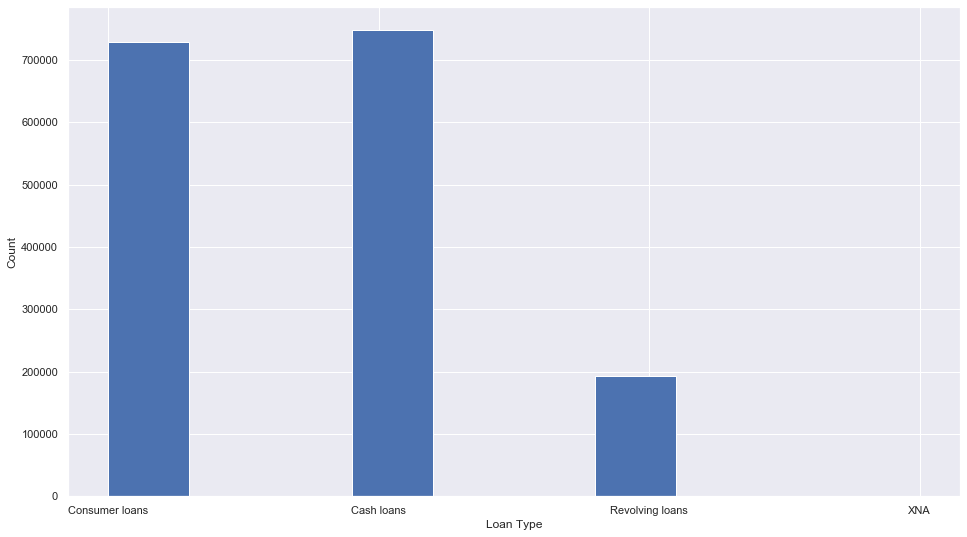

In [113]:
(df_prev['NAME_CONTRACT_TYPE']).hist()
plt.xlabel('Loan Type')
plt.ylabel('Count')

In [114]:
df_prev.shape

(1670214, 37)

In [115]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [116]:
df_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [117]:
# Checking the status of the previous aaplications
df_prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

In [118]:
df_prev['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

In [119]:
# Checking if this is the foriegn key in df_prev
df_b['SK_ID_CURR'].value_counts()

100303    1
135959    1
156441    1
160539    1
150300    1
         ..
257495    1
234968    1
237017    1
230874    1
100401    1
Name: SK_ID_CURR, Length: 307510, dtype: int64

In [120]:
df_b['SK_ID_CURR'].describe()

count    307510.000000
mean     278181.049335
std      102789.921101
min      100002.000000
25%      189146.250000
50%      278202.500000
75%      367142.750000
max      456255.000000
Name: SK_ID_CURR, dtype: float64

In [121]:
# This is the forign key
df_prev['SK_ID_CURR'].value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [122]:
df_prev['SK_ID_CURR'].describe()

count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64

In [123]:
df_prev.sort_values(by='SK_ID_CURR',ascending=False)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
729432      1708056      456255    Revolving loans     2250.000   
1383554     2631384      456255         Cash loans    54022.140   
1411592     2729207      456255     Consumer loans    11514.555   
814647      1296007      456255         Cash loans    30737.655   
214743      1743609      456255     Consumer loans    11090.835   
...             ...         ...                ...          ...   
1021650     2636178      100003     Consumer loans    64567.665   
575941      1810518      100003         Cash loans    98356.995   
1223745     2396755      100003     Consumer loans     6737.310   
892077      1038818      100002     Consumer loans     9251.775   
201668      1369693      100001     Consumer loans     3951.000   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
729432           45000.0     45000.0               NaN          45000.0   
1383554        1170000.0   1271929.5               NaN        1170000.0   
1411592          58225.5     58545.0            5823.0          58225.5   
814647          765000.0   1067940.0               NaN         765000.0   
214743          102037.5    112815.0               0.0         102037.5   
...                  ...         ...               ...              ...   
1021650         337500.0    348637.5               0.0         337500.0   
575941          900000.0   1035882.0               NaN         900000.0   
1223745          68809.5     68053.5            6885.0          68809.5   
892077          179055.0    179055.0               0.0         179055.0   
201668           24835.5     23787.0            2520.0          24835.5   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
729432                      SUNDAY                       14  ...   
1383554                     FRIDAY                       14  ...   
1411592                     FRIDAY                       18  ...   
814647                      FRIDAY                       14  ...   
214743                    THURSDAY                       18  ...   
...                            ...                      ...  ...   
1021650                     SUNDAY                       17  ...   
575941                      FRIDAY                       12  ...   
1223745                   SATURDAY                       15  ...   
892077                    SATURDAY                        9  ...   
201668                      FRIDAY                       13  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
729432           Connectivity          0.0               XNA   
1383554                   XNA         36.0        low_normal   
1411592          Connectivity          6.0              high   
814647                    XNA         60.0        low_normal   
214743              Furniture         12.0            middle   
...                       ...          ...               ...   
1021650             Furniture          6.0            middle   
575941                    XNA         12.0        low_normal   
1223745  Consumer electronics         12.0            middle   
892077        Auto technology         24.0        low_normal   
201668           Connectivity          8.0              high   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
729432                   Card Street                 NaN            NaN   
1383554             Cash X-Sell: low            365243.0         -756.0   
1411592     POS mobile with interest            365243.0         -469.0   
814647              Cash Street: low                 NaN            NaN   
214743    POS industry with interest            365243.0         -960.0   
...                              ...                 ...            ...   
1021650   POS industry with interest            365243.0         -797.0   
575941              Cash X-Sell: low            365243.0         -716.0   
1223745  POS household with interest      

## 5b. Merge Previous application data to the Application data

#####  As we understand that the previous application data contains multiple applications made by the client and the decison on those applications. So, we will focus on undertanding the total number of applications made by the clients and what & what out of the total aplication made what  % of his application were rejected. 
##### Here we found out that SK_ID_CURR colums which contains the client ID is present in Application data and previous application data.

In [124]:
# we need to make the data suitable for merging with the df_b dataframe 

df_prev_merge = df_prev[["SK_ID_CURR", 'NAME_CONTRACT_STATUS']]
df_prev_merge

SK_ID_CURR NAME_CONTRACT_STATUS
0            271877             Approved
1            108129             Approved
2            122040             Approved
3            176158             Approved
4            202054              Refused
...             ...                  ...
1670209      352015             Approved
1670210      334635             Approved
1670211      249544             Approved
1670212      400317             Approved
1670213      261212             Approved

[1670214 rows x 2 columns]

In [125]:
df_prev_merge["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [126]:
# Adding new columns to show total count of previous application by a client
df_prev_merge["TOTAL_APP_COUNT"] =   df_prev_merge.groupby(["SK_ID_CURR"]).transform("count")
df_prev_merge.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SK_ID_CURR NAME_CONTRACT_STATUS  TOTAL_APP_COUNT
0       271877             Approved                3
1       108129             Approved                6
2       122040             Approved                4
3       176158             Approved               23
4       202054              Refused               25
5       199383             Approved                6
6       175704             Canceled                4
7       296299             Canceled               17
8       342292             Canceled               14
9       334349             Canceled                6
10      447712             Approved                9
11      161140             Approved                9
12      258628             Approved                8
13      321676             Approved                5
14      270658             Approved                2
15      151612             Approved                1
16      154602             Approved                6
17      142748             Approved                5
18      396305             Approved               10
19      199178              Refused               10

In [127]:
df_prev_merge.shape

(1670214, 3)

In [128]:
df_prev_merge.sort_values(by=['TOTAL_APP_COUNT'], ascending=False)

SK_ID_CURR NAME_CONTRACT_STATUS  TOTAL_APP_COUNT
559561       187868              Refused               77
1451272      187868              Refused               77
813271       187868             Approved               77
1328052      187868              Refused               77
1182021      187868             Approved               77
...             ...                  ...              ...
1067615      295622             Approved                1
1293208      311965             Approved                1
231559       385322             Approved                1
624818       413513             Approved                1
1457701      454287             Approved                1

[1670214 rows x 3 columns]

In [129]:
# Drop unnecessary rows

df_prev_merge.drop(df_prev_merge.loc[df_prev_merge['NAME_CONTRACT_STATUS']!= "Refused"].index, inplace=True)
df_prev_merge

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


SK_ID_CURR NAME_CONTRACT_STATUS  TOTAL_APP_COUNT
4            202054              Refused               25
19           199178              Refused               10
20           166490              Refused               18
22           302212              Refused               18
23           302212              Refused               18
...             ...                  ...              ...
1670197      184353              Refused                2
1670203      383898              Refused               14
1670204      198989              Refused                6
1670205      338803              Refused                2
1670207      443544              Refused               22

[290678 rows x 3 columns]

In [130]:
# Add count of application refused or rejected by bank
df_prev_merge['APP_REFUSED_COUNT'] =  df_prev_merge.groupby(['SK_ID_CURR'])['NAME_CONTRACT_STATUS'].transform('count')
df_prev_merge.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SK_ID_CURR NAME_CONTRACT_STATUS  TOTAL_APP_COUNT  APP_REFUSED_COUNT
4       202054              Refused               25                 13
19      199178              Refused               10                  8
20      166490              Refused               18                  5
22      302212              Refused               18                 16
23      302212              Refused               18                 16

In [131]:
# making data set ready for e left merge
df_prev_merge.drop_duplicates(subset ="SK_ID_CURR", 
                     keep = False, inplace = True) 
df_prev_merge["%_APP_ REFUSAL"] = df_prev_merge['APP_REFUSED_COUNT'] / df_prev_merge['TOTAL_APP_COUNT'] * 100
df_prev_merge.drop("NAME_CONTRACT_STATUS", axis=1, inplace=True)
df_prev_merge.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

SK_ID_CURR  TOTAL_APP_COUNT  APP_REFUSED_COUNT  %_APP_ REFUSAL
29       315664                5                  1       20.000000
45       281470                3                  1       33.333333
81       454363                7                  1       14.285714
85       306707                3                  1       33.333333
125      311178                4                  1       25.000000

In [132]:
# Left joining the previous application data with the application data

df_final = pd.merge(df_b,  
                    df_prev_merge,  
                     on ='SK_ID_CURR',  
                     how ='left') 
df_final.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         NaN                       NaN   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR AGE_BINNED  \
0                       0.0                        1.0      20-30   
1                       0.0                        0.0      40-50   
2                       0.0                        0.0      50-60   
3                       NaN                        NaN      50-60   
4                       0.0                        0.0      50-60   

  TENURE_BINNED  CREDIT_BUREAU_ENQ_BINNED  TOTAL_APP_COUNT  APP_REFUSED_COUNT  \
0           0-2                  Low Risk              NaN                NaN   
1           2-5                  Low Risk              NaN                NaN   
2           0-2                  Low Risk              NaN                NaN   
3          5-10                       NaN              9.0                1.0   
4          5-10                  Low Risk              NaN                NaN   

   %_APP_ REFUSAL  
0             NaN  
1             NaN  
2             NaN  
3       11.111111  
4             NaN  

[5 rows x 45 columns]

In [133]:
# Check the important of % app refusal variable with Target variable
df_corr_final = df_final.corr()
# df_0_corr
df_corr_TARGET = df_corr_final['TARGET'].sort_values()
# df_corr_TARGET
print('+ve corr: \n{0}'.format(df_corr_TARGET.tail(10)))
print('-ve corr: \n{0}'.format(df_corr_TARGET.head(10)))

+ve corr: 
CNT_FAM_MEMBERS                0.009298
CNT_CHILDREN                   0.019179
AMT_REQ_CREDIT_BUREAU_YEAR     0.019937
DEF_60_CNT_SOCIAL_CIRCLE       0.031280
DEF_30_CNT_SOCIAL_CIRCLE       0.032252
%_APP_ REFUSAL                 0.053851
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060894
TARGET                         1.000000
APP_REFUSED_COUNT                   NaN
Name: TARGET, dtype: float64
-ve corr: 
EXT_SOURCE_3                 -0.178898
EXT_SOURCE_2                 -0.160453
DAYS_BIRTH                   -0.078232
DAYS_EMPLOYED                -0.074952
DAYS_LAST_PHONE_CHANGE       -0.055207
DAYS_ID_PUBLISH              -0.051463
TOTAL_APP_COUNT              -0.050256
DAYS_REGISTRATION            -0.041981
AMT_GOODS_PRICE              -0.039644
REGION_POPULATION_RELATIVE   -0.037220
Name: TARGET, dtype: float64


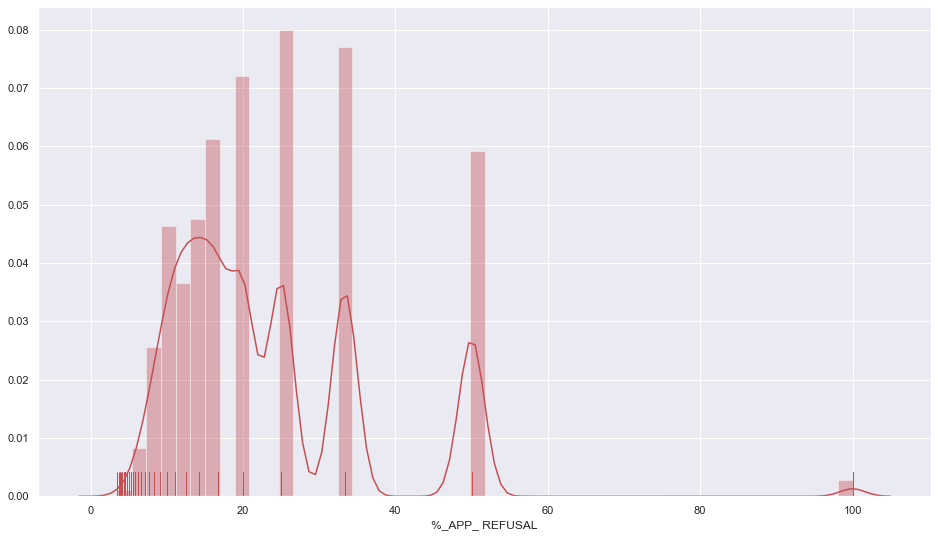

In [134]:
# The % app refusal have a high + correlation with the target variable, chekcing for its dsitribution
sns.distplot(df_final["%_APP_ REFUSAL"], kde=True, rug=True, color="r")

# Conclusion

## After performing the extensive EDA in these data sets we have come to following conclusions:-

## The correlation of variables with the TARGET variable is as follows


### + Correlation :- This means with increase in the value of these variables the chances of client defaulting on loan increases


####  %_APP_ REFUSAL                 0.053851
#### REGION_RATING_CLIENT           0.058901
#### REGION_RATING_CLIENT_W_CITY    0.060894


### - Correlation :- This means with decrease in the value of these variables the chances of client defaulting on loan increases


#### EXT_SOURCE_3                 -0.178898
#### EXT_SOURCE_2                 -0.160453
#### DAYS_BIRTH                   -0.078232
#### DAYS_EMPLOYED                -0.074952



## Very Strong Indicators:-


#### DAYS_BIRTH = The clients below age of 30 are more prone to deafult of loan repayment
####  DAYS_EMPLOYED = The clients with less than two years of service tenure are more prone to deafult on lona repayment
#### EXT_SOURCE_2 =  The Clients with normalized score from external data sourcs less than 0.4 are more prone to loan deefault
####  EXT_SOURCE_3 =  The Clients with normalized score from external data sourcs less than 0.4 are more prone to loan deefault
####  REGION_RATING_CLIENT =  The clients living in region rating =3 are more likely to default on loan repayment
####  REGION_RATING_CLIENT_W_CITY = The clients living in region rating city wise =3 are more likely to default on loan repayment
####  %_APP_ REFUSAL = The client more than 20% refused previous applications are more likely to deafult on loan repayment



## Mild Indicators:-


####  NAME_CONTRACT_TYPE =  The clients opting for cash loans are more prone to credit default
#### CODE_GENDER =  The male clients are more prone to laon deafult
####  NAME_EDUCATION_TYPE =  The clients with Secondary /secondary special education are more prone to default on loan repayment
####  NAME_FAMILY_STATUS = The client who are single/ not married are more likely to default on loan repayment
####  CNT_CHILDREN =  The clients having no children are more likely to default
####  CNT_FAM_MEMBERS =  The clients having lesser family size are more likely to default

# Suggestion based on our professional Judgement ::

### Our suggestions to the banking institution is that they should avoid giving loan if the applicant's profile meets folliwng criteria:-


##### 1. Age < 30 Years
##### 2. Service tenure < 2 Years
##### 3. Address region lies in REGION_RATING_CLIENT = 3
##### 4. Address city lies in REGION_RATING_CLIENT_W_CITY = 3
##### 5. The Score from external agencies is less than 0.4 (EXT_SOURCE_3 and EXT_SOURCE_2 < 0.4)
##### 6. %APP REFUSAL > 20% (If more than 20% of clients previous applications for loan has been rejected)

##### 7. If the client's profile matches all the mild indicator crierias

###### Further, to make sure that the you does not miss out on any potential non defaulter client who falls in this criteria, you should check previous track record and if at all he has not defaulted on his previous loans then you can reconsider his application.


# x:::::::::::::X::::::::::::X:::::::::::X:::::::::::X::::::::::X::::::::::X:::::::::X:::::::X:::::::::X